In [1]:
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/heritable_cpgs.RData")


any_heritable_or_meqtl <- unique(c(unique(c(unique(c(all_heritable_cpgs, all_meqtl_cpgs)), pop_spec_heritable_cpgs)), pop_spec_meqtl_cpgs))  
length(any_heritable_or_meqtl) 

[1] 231941

[1] 3221
[1] 1746
[1] 355103
[1] TRUE
Number of BF sig sites from random effect meta-analysis: 1746
Number of BF sig sites from fixed effect meta-analysis: 3221
number of overlapping Horvath and random effect meta-analysis sites: 25
number of overlapping Horvath and fixed effect meta-analysis sites: 35
number of overlapping literature and fixed effect meta-analysis sites: 1637
[1] 3221
Number of sig sites with sig heterogeneity across pops from fixed effect meta-analysis:5

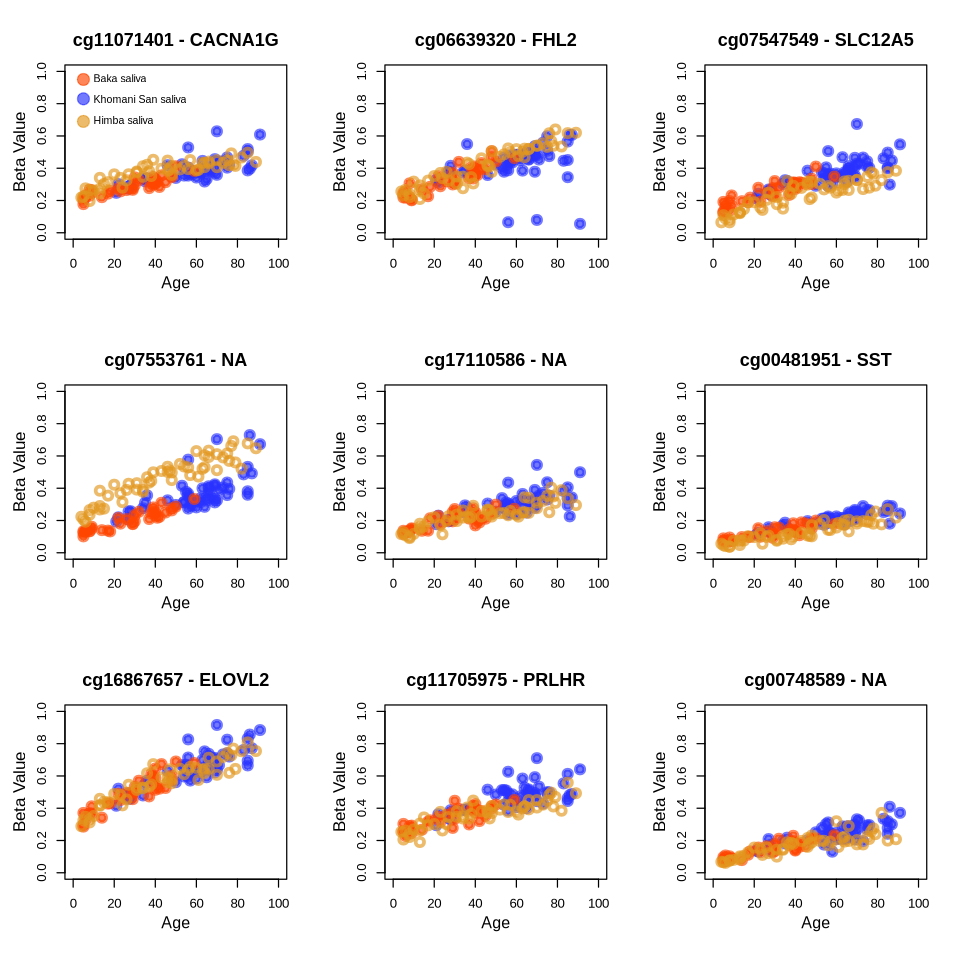

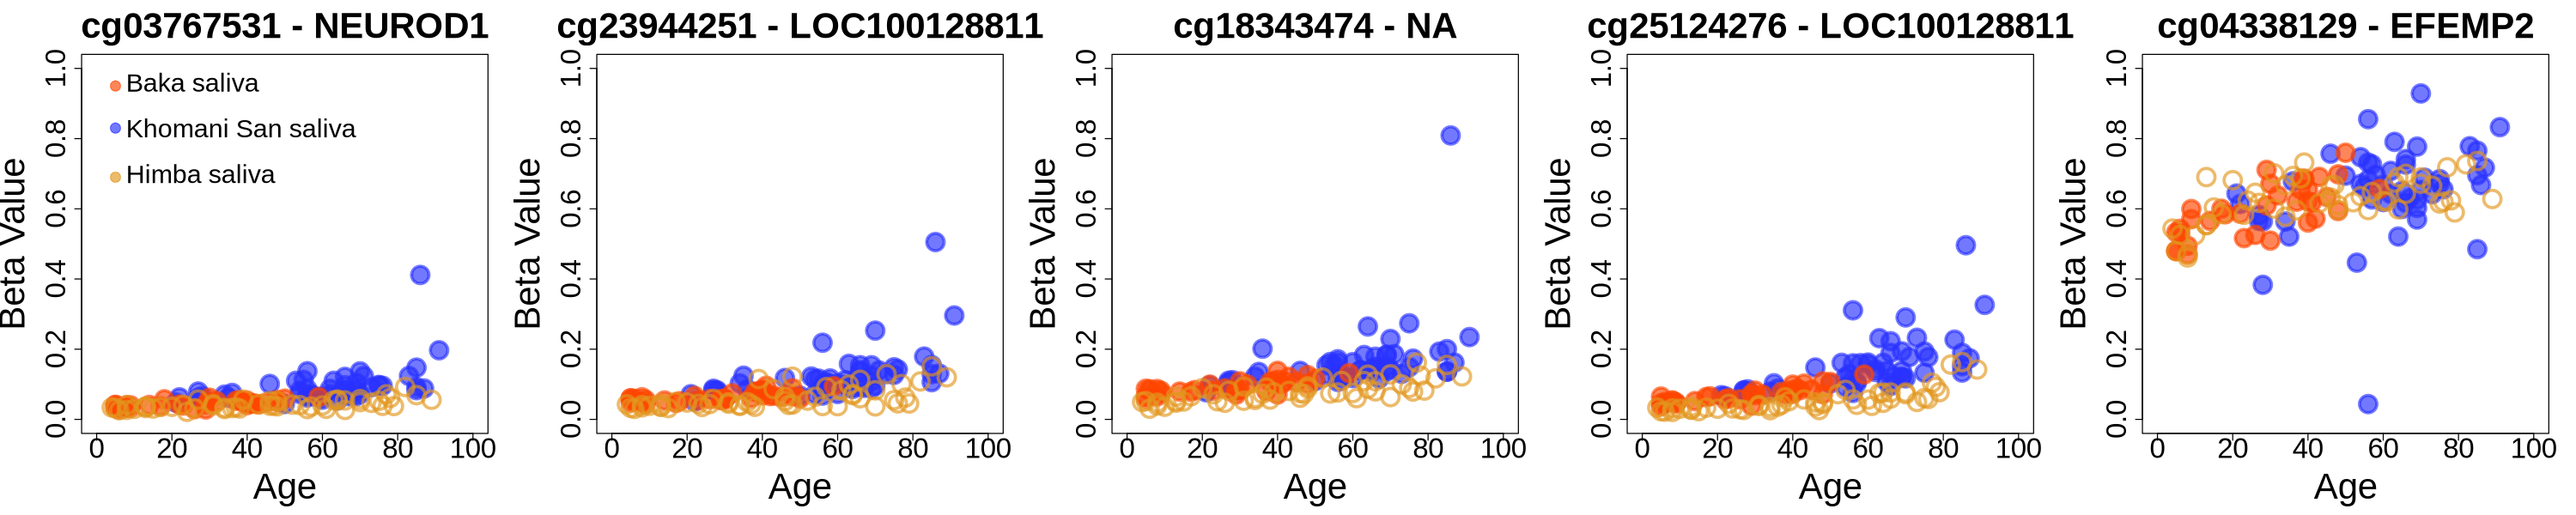

[1] 645

[1] 3221

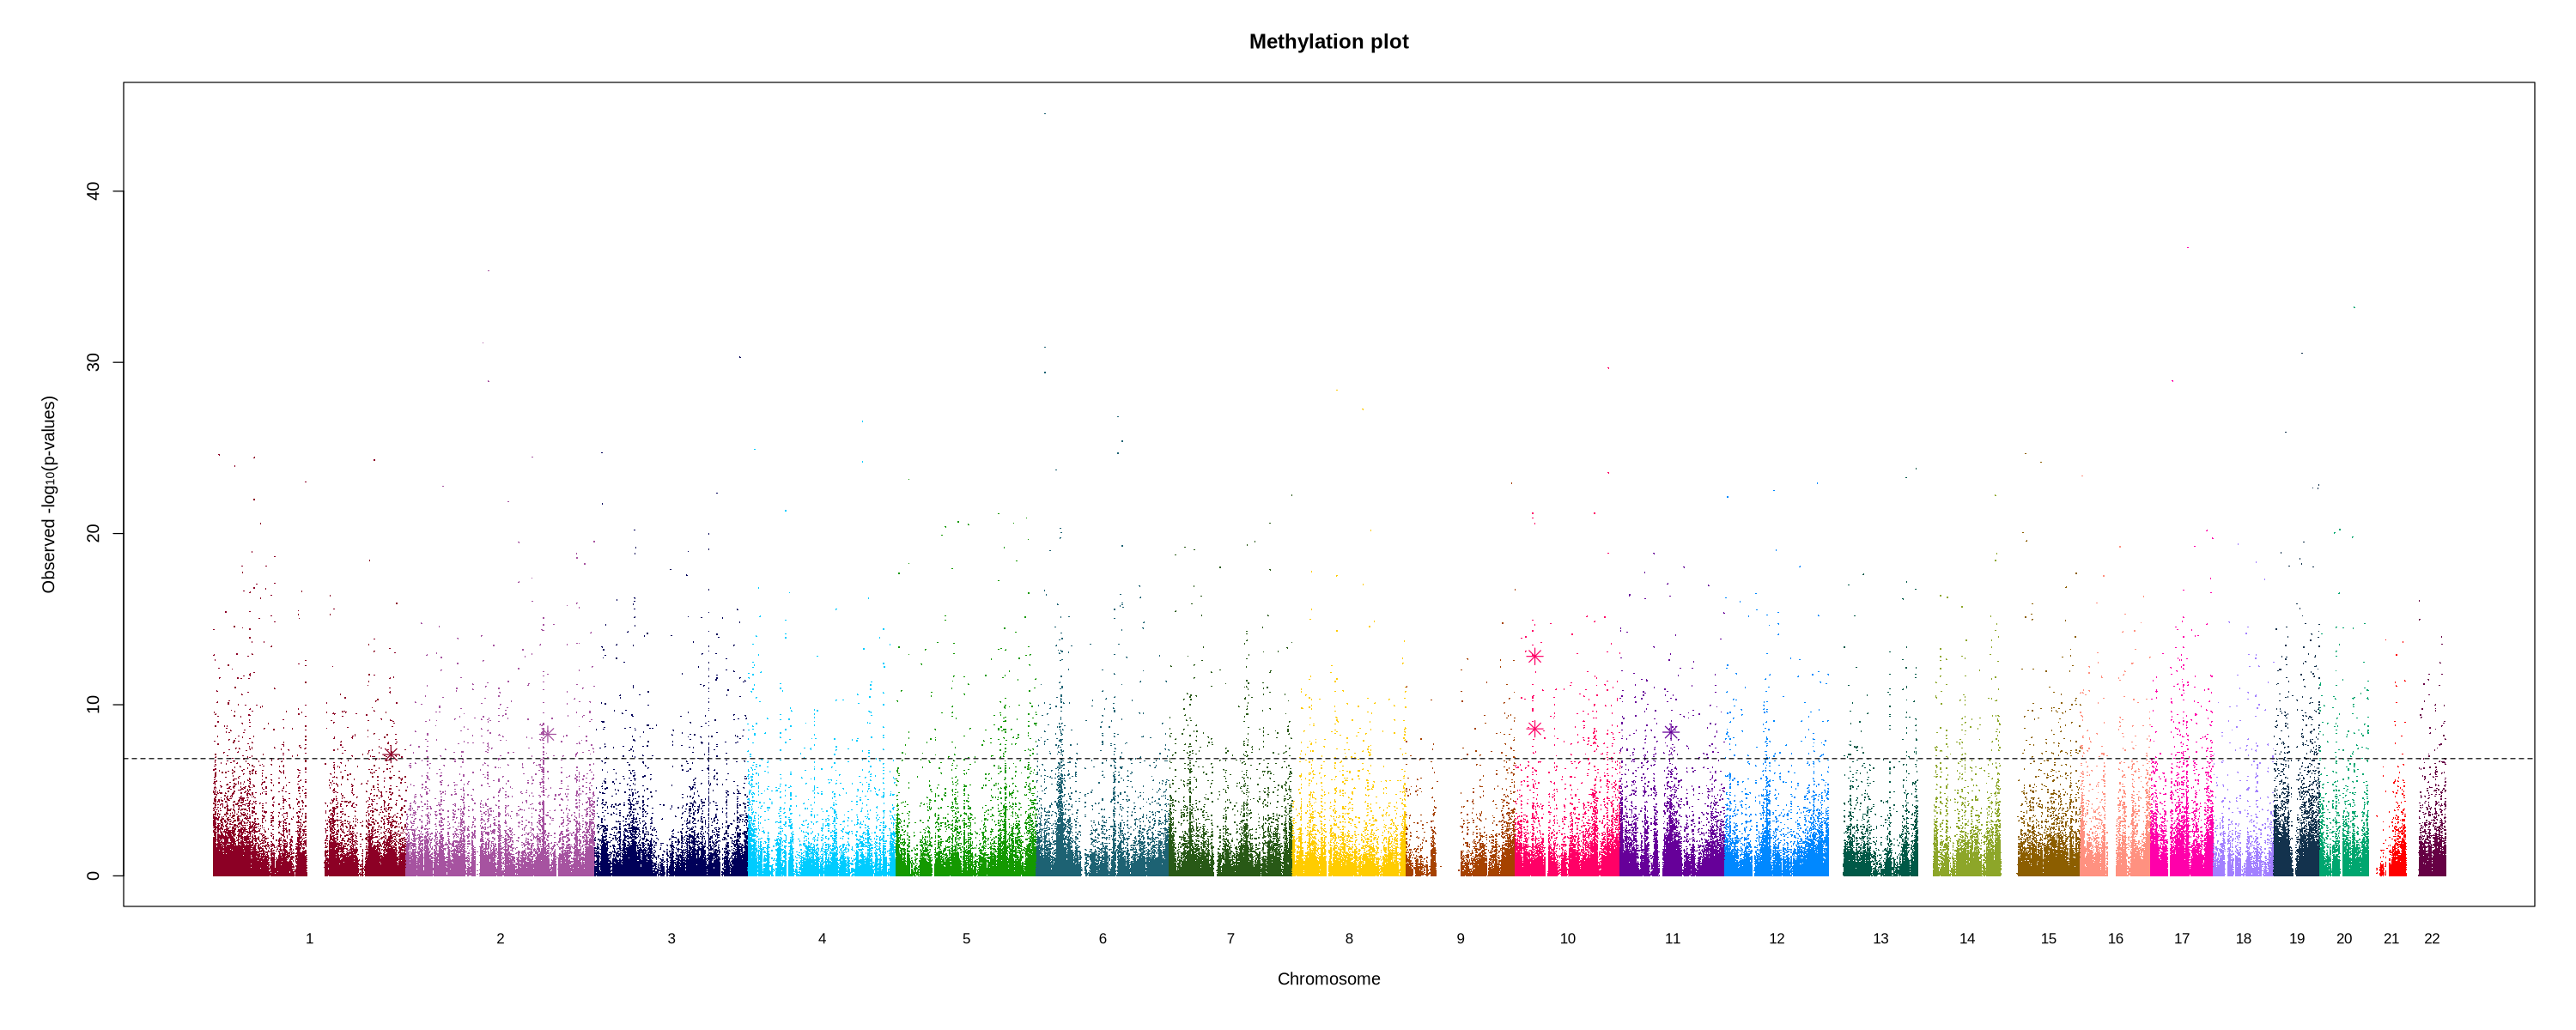

In [9]:
###################no meqtl regress############
##metagen metanalysis
Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")
load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")


load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
setwd("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/")
fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
random_sig <- subset(meta_gen, P.value.random < .05/nrow(meta_gen))
print(nrow(fixed_sig))
print(nrow(random_sig))
print(nrow(meta_gen))
sig <- fixed_sig #####change to fixed or random

save(list=c("fixed_sig", "random_sig"), file="meta_gen_sig.RData")
sig <- sig[order(sig$P.value.random),]
# print("cg04922029" %in% sig$CPG.Labels) #DARC meQTL KHS
# print("cg10839385" %in% sig$CPG.Labels) #DARC meQTL Baka
print("cg16867657" %in% sig$CPG.Labels) #ELVOL2
rownames(sig) <- sig$CPG.Labels

cat(paste0("Number of BF sig sites from random effect meta-analysis: ", nrow(random_sig), "\n"))
cat(paste0("Number of BF sig sites from fixed effect meta-analysis: ", nrow(fixed_sig), "\n"))
cat(paste0("number of overlapping Horvath and random effect meta-analysis sites: ", length(intersect(Horvath_sites, random_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping Horvath and fixed effect meta-analysis sites: ", length(intersect(Horvath_sites, fixed_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping literature and fixed effect meta-analysis sites: ", length(intersect(lit_sites, fixed_sig$CPG.Labels)), "\n")) 

options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(3,3))

#same ID order
KHS_merged <- KHS_merged[rownames(sig),]
Himba_merged <- Himba_merged[rownames(sig),]
Baka <- Baka[rownames(sig),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)

for (i in head(sig$CPG.Labels, 9)) {
      plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      par(new=T)
      plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      par(new=T)
      plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3,
           ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F,  cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=0.8)
      mtext("Beta Value", side=2, line=2.3, cex=0.85)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=0.9, font=2)
      if (match(i, sig$CPG.Labels)%% 9 == 1) {
        points(c(5, 5, 5), c(0.95, 0.83, .69), pch=19 , col=c(baka.col, ks.col, himba.col), cex=2)
        text(6, 0.95, "Baka saliva", cex=0.8, pos=4)
        text(6, 0.82, "Khomani San saliva", cex=0.8, pos=4)
        text(6, 0.69, "Himba saliva", cex=0.8, pos=4)
      }
    }

save(sig, file = "metagen_sig_fixed_no_meqtl_regress.RData")

####of the sig sites from above, which have significant heterogeneity of effects
load("metagen_sig_fixed_no_meqtl_regress.RData")
print(nrow(sig))
n <- .05/nrow(sig)

sig_het <- subset(sig, het.P.value < n)


sig_het <- sig_het[order(sig_het$het.P.value),]
rownames(sig_het) <- sig_het$CPG.Labels
cat(paste0("Number of sig sites with sig heterogeneity across pops from fixed effect meta-analysis:", nrow(sig_het)))

sig_het_cpgs <- sig_het$CPG.Labels
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/")
save(sig_het_cpgs, file="sig_het.RData")

#same ID order
KHS_merged <- KHS_merged[rownames(sig_het),]
Himba_merged <- Himba_merged[rownames(sig_het),]
Baka <- Baka[rownames(sig_het),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)

options(repr.plot.width = 25, repr.plot.height = 5)
par(mfrow = c(1,5))
par(mar=c(6, 6, 4, 2))
for (i in sig_het$CPG.Labels) {
  plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
       ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=3.4)
  par(new=T)
  plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
       ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=3.4)
  par(new=T)
  plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3,
       ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F, cex=3.4)
  box()
  
  # Draw axes with larger tick labels
  axis(side=1, cex.axis=2.5)
  axis(side=2, cex.axis=2.5)
  
  # Adjust x-axis title to avoid overlap with ticks
  mtext("Age", side=1, line=4, cex=2.1)  # Increase line value to move title further down
  mtext("Beta Value", side= 2, line=4, cex=2.1)
  mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i, probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
        side=3, line=1, cex=2.1, font=2)
  
  if (match(i, sig_het$CPG.Labels) %% 9 == 1) {
    points(c(5, 5, 5), c(0.95, 0.83, .69), pch=19 , col=c(baka.col, ks.col, himba.col), cex=2)
    text(6, 0.95, "Baka saliva", cex=2.3, pos=4)
    text(6, 0.82, "Khomani San saliva", cex=2.3, pos=4)
    text(6, 0.69, "Himba saliva", cex=2.3, pos=4)
  }
}
save(sig_het, file="sig_het_BF_sites_no_meqtl_regress.RData")
#manhattan plotting age_sites

options(repr.plot.width = 25, repr.plot.height = 10)
par(mfrow = c(1,1))
testinfo <- meta_gen[,c(1,3,4)]
site.info <- probe.info[probe.info$TargetID %in% testinfo$CPG.Labels,]

manhattan.plot <- function(testinfo, siteinfo, sigtype="Bonferroni", chr.col.pick=1:24, label.sig=F, main.title="Methylation plot") {
  colnames(testinfo) <- c("label", "sig_pvalue", "het_pvalue")
  sorted <- match(siteinfo$TargetID, testinfo$label)
  
  # Define the variables
  chr <- siteinfo$CHR
  chr[chr=="X"] <- 23
  chr[chr=="Y"] <- 24
  genomepos <- siteinfo$MAPINFO
  score <- -log10(testinfo$sig_pvalue[sorted])
  het_score <- -log10(testinfo$het_pvalue[sorted])
  chr.unique <- unique(chr)
  
  # Convert map info to a 'genome position' that is continuous so that it can be plotted
  if (length(chr.unique) > 1) {
    for (i in chr.unique[2:length(chr.unique)]) {
      genomepos[which(chr==i)] <- genomepos[which(chr==i)] +
                                  max(genomepos[which(chr==chr.unique[which(chr.unique==i)-1])]) + 100
    }
  }
  
  # Significance type
  if (sigtype == "Bonferroni") {
    sig.cutoff <- 0.05 / nrow(testinfo)
    sig_het.cutoff <- .05 / nrow(sig)
    sig <- which(testinfo$sig_pvalue[sorted] <= sig.cutoff)
    sig_het <- which(testinfo$het_pvalue[sorted] <= sig_het.cutoff & testinfo$sig_pvalue[sorted] <= sig.cutoff)}
  
  # Graphics
  x.lab <- chr.unique
  chr.colours <- c("#8c0025", "#a653a0", "#000059", "#00ccff", "#149900", "#1d6273",
                   "#285916", "#ffcc00", "#a64200", "#ff0066", "#660099", "#0088ff",
                   "#005947", "#8da629", "#8c5e00", "#ff9180", "#ff00aa", "#a280ff",
                   "#13324d", "#00a66f", "#ff0000", "#660044", "#686080", "#eeff00")
  
  if (length(chr.unique) < length(chr.col.pick)) {
    chr.col.pick <- 1:(length(chr.unique))
  } else if (length(chr.unique) > length(chr.col.pick)) {
    n.reps <- as.integer(length(chr.unique) / length(chr.col.pick))
    n.remain <- as.integer(length(chr.unique) %% length(chr.col.pick))
    if (n.remain == 0) {
      chr.col.pick <- rep(chr.col.pick, n.reps)
    } else {
      chr.col.pick <- c(rep(chr.col.pick, n.reps), chr.col.pick[1:n.remain])
    }
  }
  
  point.cols <- c()
  for (i in chr.unique) {
    point.cols[which(siteinfo$CHR==i)] <- chr.colours[chr.col.pick[i]]
  }
  
  # Determine plot location of chromosome number labels
  chr.lab.loc <- c()
  for (i in chr.unique) {
    chr.range <- range(genomepos[which(probe.info$CHR==i)])
    chr.lab.loc[i] <- (chr.range[2] - chr.range[1]) / 2 + chr.range[1]
  }
  chr.lab.loc <- as.numeric(na.omit(chr.lab.loc))
  
  # Make the Manhattan plot
  plot(range(genomepos), c(0, max(score, het_score, na.rm=T) + 0.05), type="n", xaxt="n", main=main.title,
       xlab="Chromosome", ylab=expression(paste("Observed -log", scriptstyle(10), "(p-values)", sep="")))
  
  # Plot significant points for both sig and sig_het
  #points(genomepos[sig], score[sig], col=point.cols[sig], pch=16, cex=0.6)
  points(genomepos[sig_het], score[sig_het], col=point.cols[sig_het], pch=8, cex=1.5)
  points(genomepos, score, col=point.cols, pch=16, cex=0.2)
  
  # Add significance cutoff lines
  abline(-log10(sig.cutoff), 0, lty=2)
  #abline(-log10(sig_het.cutoff), 0, lty=2)
  
  # Add chromosome labels
  axis(1, at=chr.lab.loc, labels=chr.unique, tick=F, cex.axis=0.85)
  
  # Optionally label significant points
  if (label.sig) {
    text(genomepos[which(testinfo$sig_pvalue <= sig.cutoff)] + (range(genomepos)[2] - range(genomepos)[1]) * 0.025,
         score[which(testinfo$sig_pvalue <= sig.cutoff)], testinfo$label[which(testinfo$sig_pvalue <= sig.cutoff)], cex=0.6)
  }
}
#svg("Figure1.svg")
manhattan.plot(testinfo, probe.info) 
#dev.off()

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")
length(fixed_sig$CPG.Labels[fixed_sig$CPG.Labels %in% pop_spec_meqtl_cpgs])

length(fixed_sig$CPG.Labels)

[1] 3427
[1] 1864
[1] 355103
[1] TRUE
Number of BF sig sites from random effect meqtl regressed meta-analysis: 1864
Number of BF sig sites from fixed effect  meqtl regressedmeta-analysis: 3427
number of overlapping Horvath and random effect meqtl regressed meta-analysis sites: 24
number of overlapping Horvath and fixed effect meqtl regressed meta-analysis sites: 35
number of overlapping literature and fixed effect meqtl regressed meta-analysis sites: 1704
[1] 3427
Number of sig sites with sig heterogeneity across pops from fixed effect meqtl regressed meta-analysis:4

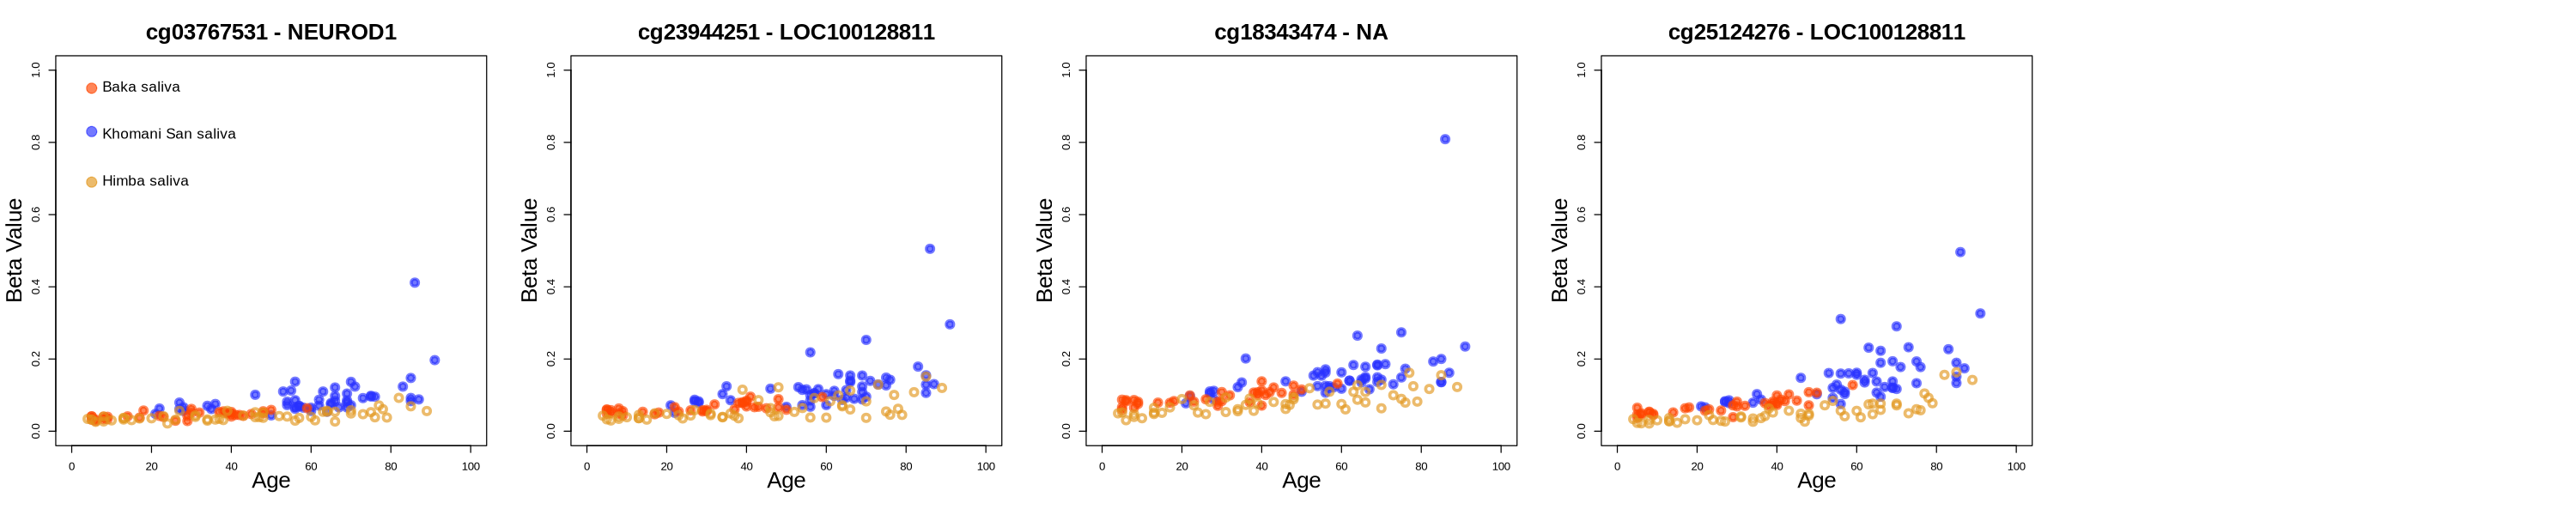

In [3]:
###MEQTL regressed meta-analysis
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")

fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
random_sig <- subset(meta_gen, P.value.random < .05/nrow(meta_gen))
print(nrow(fixed_sig))
print(nrow(random_sig))
print(nrow(meta_gen))
sig <- fixed_sig #####change to fixed or random

save(list=c("fixed_sig", "random_sig"), file="meta_gen_sig.RData")
sig <- sig[order(sig$P.value.random),]
# print("cg04922029" %in% sig$CPG.Labels) #DARC meQTL KHS
# print("cg10839385" %in% sig$CPG.Labels) #DARC meQTL Baka
print("cg16867657" %in% sig$CPG.Labels) #ELVOL2
rownames(sig) <- sig$CPG.Labels

cat(paste0("Number of BF sig sites from random effect meqtl regressed meta-analysis: ", nrow(random_sig), "\n"))
cat(paste0("Number of BF sig sites from fixed effect  meqtl regressedmeta-analysis: ", nrow(fixed_sig), "\n"))
cat(paste0("number of overlapping Horvath and random effect meqtl regressed meta-analysis sites: ", length(intersect(Horvath_sites, random_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping Horvath and fixed effect meqtl regressed meta-analysis sites: ", length(intersect(Horvath_sites, fixed_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping literature and fixed effect meqtl regressed meta-analysis sites: ", length(intersect(lit_sites, fixed_sig$CPG.Labels)), "\n")) 

options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(3,3))

#same ID order
KHS_merged <- KHS_merged[rownames(sig),]
Himba_merged <- Himba_merged[rownames(sig),]
Baka <- Baka[rownames(sig),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)


save(sig, file = "metagen_sig_fixed_meqtl_regressed.RData")

####of the sig sites from above, which have significant heterogeneity of effects
load("metagen_sig_fixed_meqtl_regressed.RData")
print(nrow(sig))
n <- .05/nrow(sig)

sig_het <- subset(sig, het.P.value < n)


sig_het <- sig_het[order(sig_het$het.P.value),]
rownames(sig_het) <- sig_het$CPG.Labels
cat(paste0("Number of sig sites with sig heterogeneity across pops from fixed effect meqtl regressed meta-analysis:", nrow(sig_het)))

sig_het_cpgs <- sig_het$CPG.Labels
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/")

#same ID order
KHS_merged <- KHS_merged[rownames(sig_het),]
Himba_merged <- Himba_merged[rownames(sig_het),]
Baka <- Baka[rownames(sig_het),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)

options(repr.plot.width = 25, repr.plot.height = 5)
par(mfrow = c(1,5))

for (i in sig_het$CPG.Labels) {
      plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
     #text(KHS_pheno_merged$age, KHS_merged[i,]-0.01, labels=KHS_pheno_merged$IID)
      par(new=T)
      plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      par(new=T)
      plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3,
           ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F,  cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.3)
      mtext("Beta Value", side=2, line=2.3, cex=1.3)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.3, font=2)
      if (match(i, sig_het$CPG.Labels)%% 9 == 1) {
        points(c(5, 5, 5), c(0.95, 0.83, .69), pch=19 , col=c(baka.col, ks.col, himba.col), cex=2)
        text(6, 0.95, "Baka saliva", cex=1.3, pos=4)
        text(6, 0.82, "Khomani San saliva", cex=1.3, pos=4)
        text(6, 0.69, "Himba saliva", cex=1.3, pos=4)
      }
    }

[1] 2902
[1] 1578
[1] 355103
[1] TRUE
Number of BF sig sites from random effect fusion regressed meta-analysis: 1578
Number of BF sig sites from fixed effect  fusion regressed meta-analysis: 2902
number of overlapping Horvath and random effect fusion regressed meta-analysis sites: 24
number of overlapping Horvath and fixed effect fusion regressed meta-analysis sites: 33
number of overlapping literature and fixed effect fusion regressed meta-analysis sites: 1475
[1] 2902
Number of sig sites with sig heterogeneity across pops from fixed effect meqtl regressed meta-analysis:3

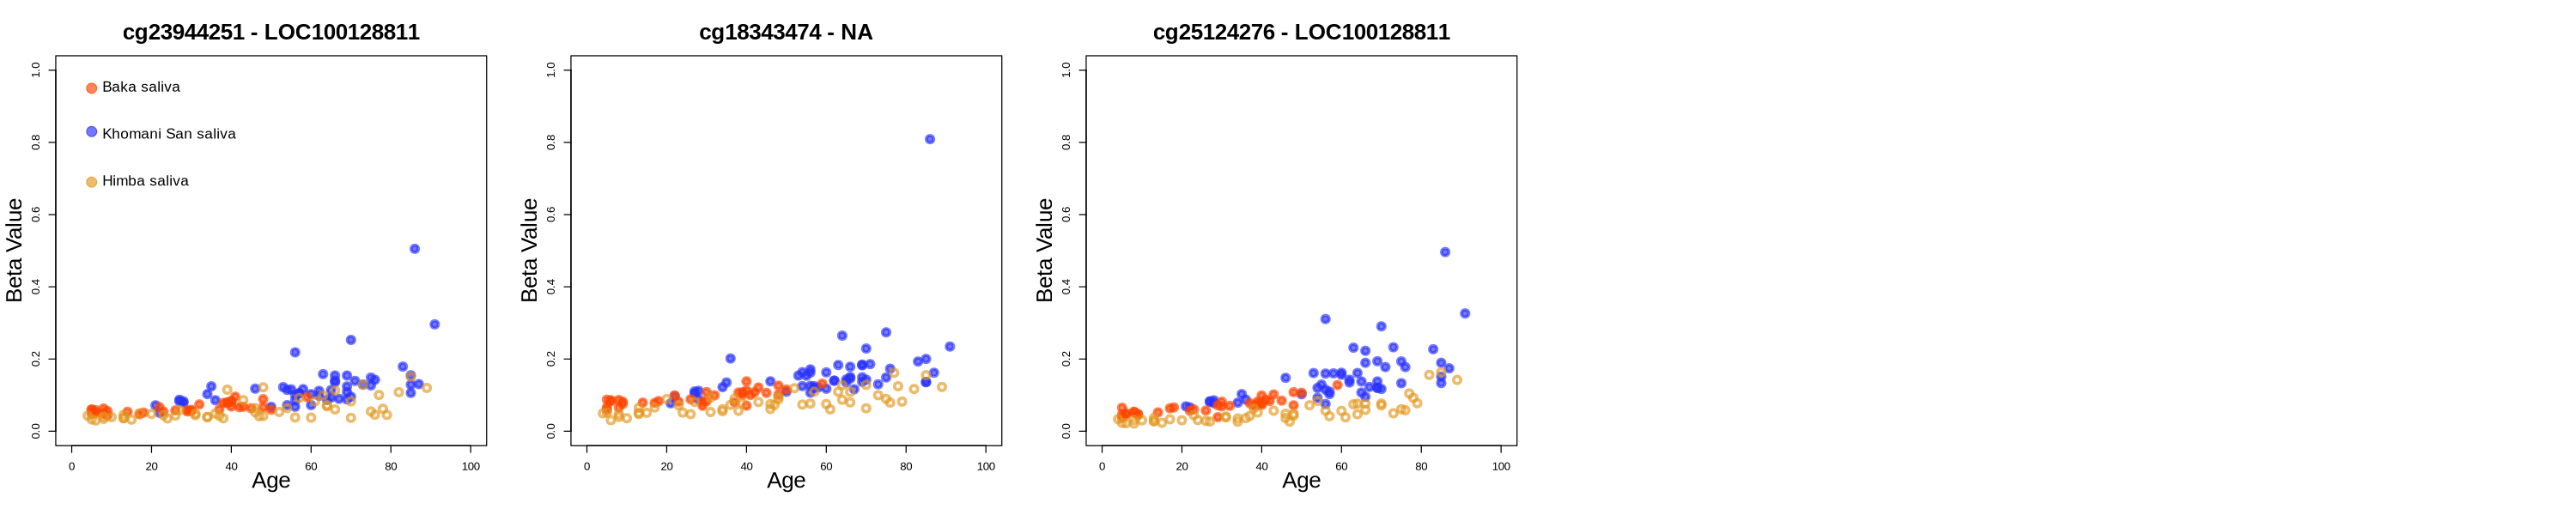

In [4]:
####FUSION REGRESSED META-ANALYSIS
###FUSION regressed meta-analysis

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_fusion_regressed.RData")

fixed_sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
random_sig <- subset(meta_gen, P.value.random < .05/nrow(meta_gen))
print(nrow(fixed_sig))
print(nrow(random_sig))
print(nrow(meta_gen))
sig <- fixed_sig #####change to fixed or random

save(list=c("fixed_sig", "random_sig"), file="meta_gen_sig.RData")
sig <- sig[order(sig$P.value.random),]
# print("cg04922029" %in% sig$CPG.Labels) #DARC meQTL KHS
# print("cg10839385" %in% sig$CPG.Labels) #DARC meQTL Baka
print("cg16867657" %in% sig$CPG.Labels) #ELVOL2
rownames(sig) <- sig$CPG.Labels

cat(paste0("Number of BF sig sites from random effect fusion regressed meta-analysis: ", nrow(random_sig), "\n"))
cat(paste0("Number of BF sig sites from fixed effect  fusion regressed meta-analysis: ", nrow(fixed_sig), "\n"))
cat(paste0("number of overlapping Horvath and random effect fusion regressed meta-analysis sites: ", length(intersect(Horvath_sites, random_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping Horvath and fixed effect fusion regressed meta-analysis sites: ", length(intersect(Horvath_sites, fixed_sig$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping literature and fixed effect fusion regressed meta-analysis sites: ", length(intersect(lit_sites, fixed_sig$CPG.Labels)), "\n")) 

options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow = c(3,3))

#same ID order
KHS_merged <- KHS_merged[rownames(sig),]
Himba_merged <- Himba_merged[rownames(sig),]
Baka <- Baka[rownames(sig),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)


save(sig, file = "metagen_sig_fixed_fusion_regressed.RData")

####of the sig sites from above, which have significant heterogeneity of effects
load("metagen_sig_fixed_fusion_regressed.RData")
print(nrow(sig))
n <- .05/nrow(sig)

sig_het <- subset(sig, het.P.value < n)


sig_het <- sig_het[order(sig_het$het.P.value),]
rownames(sig_het) <- sig_het$CPG.Labels
cat(paste0("Number of sig sites with sig heterogeneity across pops from fixed effect meqtl regressed meta-analysis:", nrow(sig_het)))

sig_het_cpgs <- sig_het$CPG.Labels
setwd("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/")

#same ID order
KHS_merged <- KHS_merged[rownames(sig_het),]
Himba_merged <- Himba_merged[rownames(sig_het),]
Baka <- Baka[rownames(sig_het),]
KHS_merged <- KHS_merged[,rownames(KHS_pheno_merged)]
Himba_merged <- Himba_merged[,rownames(Himba_pheno_merged)]
Baka <- Baka[,rownames(Baka_pheno)]

ks.col <- rgb(40/255, 50/255, 255/255, 0.65)
baka.col <- rgb(255/255, 70/255, 0/255, 0.65)
himba.col <- rgb(225/255, 150/255, 30/255, 0.65)

options(repr.plot.width = 25, repr.plot.height = 5)
par(mfrow = c(1,5))

for (i in sig_het$CPG.Labels) {
      plot(KHS_pheno_merged$age, KHS_merged[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=ks.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
     #text(KHS_pheno_merged$age, KHS_merged[i,]-0.01, labels=KHS_pheno_merged$IID)
      par(new=T)
      plot(Baka_pheno$age, Baka[i,], lwd=3, pch=19,
           ylim=c(0,1), xlim=c(0,100), col=baka.col, xlab=NA, ylab=NA, axes=F, cex=1.4)
      par(new=T)
      plot(Himba_pheno_merged$age, Himba_merged[i,], lwd=3,
           ylim=c(0,1), xlim=c(0,100), col=himba.col, xlab=NA, ylab=NA, axes=F,  cex=1.4)
      box()
      axis(side=1)
      axis(side=2)
      mtext("Age", side=1, line=2.3, cex=1.3)
      mtext("Beta Value", side=2, line=2.3, cex=1.3)
      mtext(paste(i, "-", unlist(strsplit(as.character(probe.info[match(i,probe.info$TargetID), "UCSC_REFGENE_NAME"]), split=";"))[1]),
            side=3, line=1, cex=1.3, font=2)
      if (match(i, sig_het$CPG.Labels)%% 9 == 1) {
        points(c(5, 5, 5), c(0.95, 0.83, .69), pch=19 , col=c(baka.col, ks.col, himba.col), cex=2)
        text(6, 0.95, "Baka saliva", cex=1.3, pos=4)
        text(6, 0.82, "Khomani San saliva", cex=1.3, pos=4)
        text(6, 0.69, "Himba saliva", cex=1.3, pos=4)
      }
    }



In [5]:
load("metagen_sig_fixed_meqtl_regressed.RData")
meqtl_regress <- sig
rm(list =c("sig"))
load("metagen_sig_fixed_no_meqtl_regress.RData")
meqtl_no_regress <- sig
load("metagen_sig_fixed_fusion_regressed.RData")
fusion_regress <- sig

nrow(meqtl_regress)
nrow(meqtl_no_regress)
nrow(fusion_regress)
paste0("# of hits from original that stayed significant after meqtl regression: ", nrow(meqtl_no_regress[meqtl_no_regress$CPG.Labels %in% meqtl_regress$CPG.Labels,]))
paste0("# of hits from original that stayed significant after fusion regression: ", nrow(meqtl_no_regress[meqtl_no_regress$CPG.Labels %in% fusion_regress$CPG.Labels,]))

paste0("# of hits not in original, but in meqtl regression: ", nrow(meqtl_regress[!meqtl_regress$CPG.Labels %in% meqtl_no_regress$CPG.Labels,]))
paste0("# of hits not in original, but in fusion regression: ", nrow(fusion_regress[!fusion_regress$CPG.Labels %in% meqtl_no_regress$CPG.Labels,]))

paste0("# of hits not in meqtl but in fusion regression: ", nrow(fusion_regress[!fusion_regress$CPG.Labels %in% meqtl_regress$CPG.Labels,]))
paste0("# of hits not in fusion but in meqtl regression: ", nrow(meqtl_regress[!meqtl_regress$CPG.Labels %in% fusion_regress$CPG.Labels,]))



[1] 3427

[1] 3221

[1] 2902

[1] "# of hits from original that stayed significant after meqtl regression: 3203"

[1] "# of hits from original that stayed significant after fusion regression: 2877"

[1] "# of hits not in original, but in meqtl regression: 224"

[1] "# of hits not in original, but in fusion regression: 25"

[1] "# of hits not in meqtl but in fusion regression: 30"

[1] "# of hits not in fusion but in meqtl regression: 555"


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "sig sites in meta no regress: 3221"

[1] "sig sites that have an meqtl: 645"

[1] 645

[1] "percent of time p-value improved with meqtl regression for sig_sites: 0.342635658914729"

,CPG.Labels,P.value.random_old,P.value.fix_old,het.P.value_old,p_value_old,P.value.random_meqtls,P.value.fix_meqtls,het.P.value_meqtls,p_value_meqtls,diff,IsTarget
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
208,cg07062262,1.469379e-08,1.469379e-08,0.9872029,7.832866,2.235242e-14,2.235242e-14,0.8970711,13.65068,5.817809,TRUE


[1] "total sites that have an meqtl: 85080"

[1] 85080

[1] "percent of time p-value improved with meqtl regression for all sites with meqtl: 0.0236013164080865"

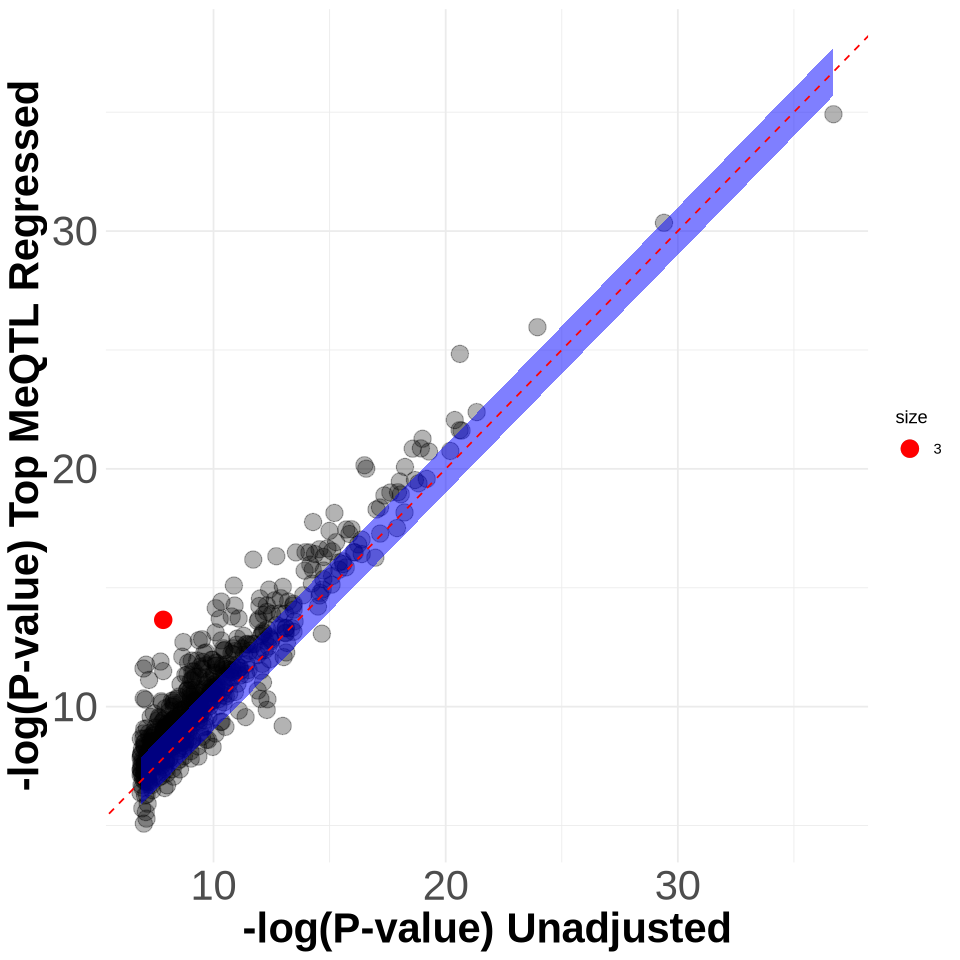

[1] "Horvath sites with pop_spec_meqtls: 88"

[1] 78

[1] "horvath sites with meqtl in the meta-ewas: 78"

[1] "percent of time horvath p-value improved with meqtl regression for horvath sites: 0.0512820512820513"

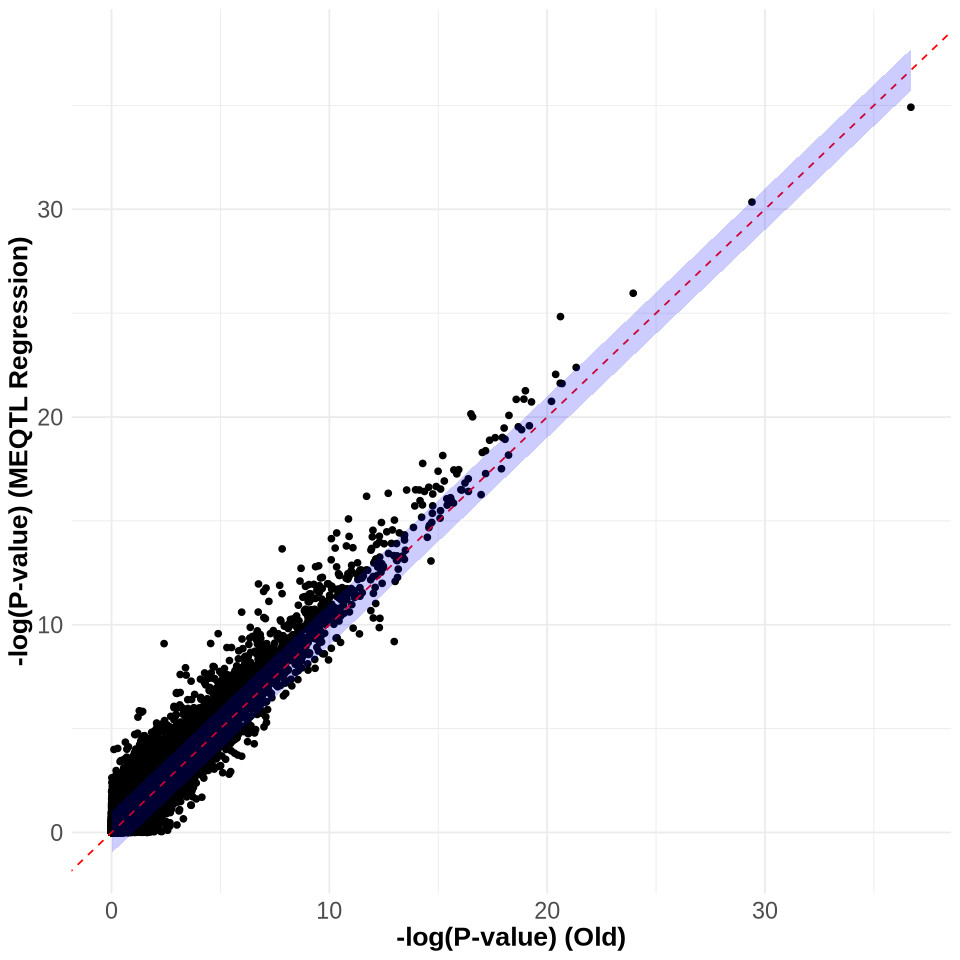

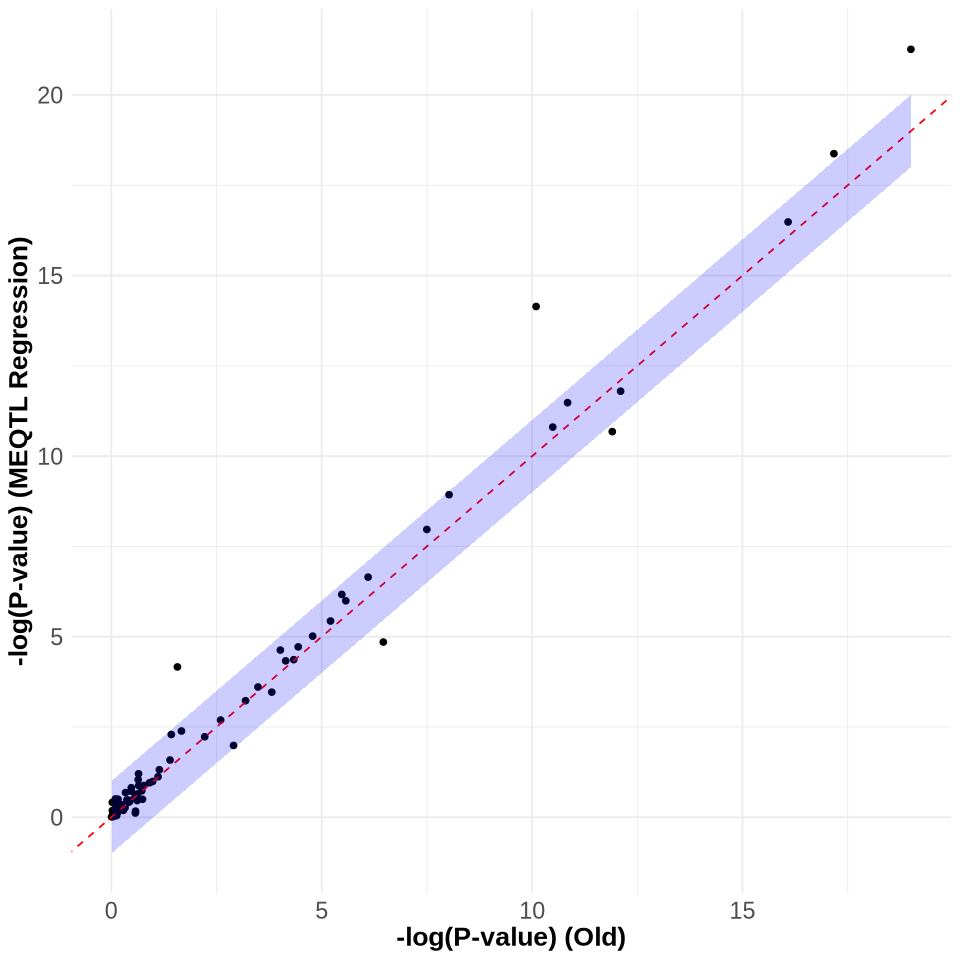

In [6]:
##P-value improvement for meta_ewas
rm(list=ls())
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value.fix < .05/n)
}
library(ggplot2)
library(dplyr)
Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker
options(repr.plot.width = 8, repr.plot.height = 8)

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
meta_no_regress <- meta_gen
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")
meta_meqtl_regress <- meta_gen


####for sig sites#########
meta_no_regress_sig <- sig_sites(meta_no_regress)
paste0("sig sites in meta no regress: ", nrow(meta_no_regress_sig))

meta_no_regress_sig_meqtl_cpgs <- meta_no_regress_sig %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
meta_meqtl_regress_sig_cpgs <- meta_meqtl_regress %>% filter(CPG.Labels %in% meta_no_regress_sig_meqtl_cpgs$CPG.Labels)
paste0("sig sites that have an meqtl: ", nrow(meta_no_regress_sig_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
meta_no_regress_sig_meqtl_cpgs$p_value_old <- -log10(meta_no_regress_sig_meqtl_cpgs$P.value.fix)
meta_meqtl_regress_sig_cpgs$p_value_meqtls <- -log10(meta_meqtl_regress_sig_cpgs$P.value.fix)

# Merge the datasets
p_val <- merge(meta_no_regress_sig_meqtl_cpgs, meta_meqtl_regress_sig_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)
nrow(p_val)
# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time p-value improved with meqtl regression for sig_sites: ", improved_ratio)
#paste0("mean diff in p-value for improved associations for sig_sites: ", mean(p_val[p_val$diff > 0, "diff"]))
#svg("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Figure4a.svg")

# Add a column to indicate if the point corresponds to "cpg07062262"
p_val$IsTarget <- ifelse(p_val$diff == max(p_val$diff), TRUE, FALSE)

p_val[p_val$diff == max(p_val$diff),]

library(ggplot2)



# Plot
ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point(data = subset(p_val, IsTarget == FALSE), aes(size = 3), color = "black", alpha=0.3) +
  geom_point(data = subset(p_val, IsTarget == TRUE), aes(size = 3), color = "red") +
  geom_ribbon(aes(ymin = p_value_old - 1, ymax = p_value_old + 1), alpha = 0.5, fill = "blue") +
  labs(
    x = "-log(P-value) Unadjusted",
    y = "-log(P-value) Top MeQTL Regressed"
  ) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 25),        # Increase axis text size
    axis.title = element_text(size = 25, face = "bold"),  # Increase axis title size
    plot.title = element_text(size = 25, face = "bold")   # Increase plot title size
  )
write.table(p_val, file="/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/age_meqtl_metaewas_regress_vs_no_regress.csv", quote=FALSE, row.names=FALSE, col.names=FALSE)

#dev.off()
####for all sites#########

meta_meqtl_no_regress_meqtl_cpgs <- meta_no_regress %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
meta_meqtl_regress_meqtl_cpgs <- meta_meqtl_regress  %>% filter(CPG.Labels %in% meta_meqtl_no_regress_meqtl_cpgs$CPG.Labels)
paste0("total sites that have an meqtl: ", nrow(meta_meqtl_no_regress_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
meta_meqtl_no_regress_meqtl_cpgs$p_value_old <- -log10(meta_meqtl_no_regress_meqtl_cpgs$P.value.fix)
meta_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(meta_meqtl_regress_meqtl_cpgs$P.value.fix)

# Merge the datasets
p_val <- merge(meta_meqtl_no_regress_meqtl_cpgs, meta_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
nrow(p_val)
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time p-value improved with meqtl regression for all sites with meqtl: ", improved_ratio)
#paste0("mean diff in p-value for improved associations for all sites with meqtl: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (MEQTL Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_ribbon(aes(ymin = p_value_old - 1, ymax = p_value_old + 1), alpha = 0.2, fill = "blue") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 14),        # Increase axis text size
    axis.title = element_text(size = 16, face = "bold"),  # Increase axis title size
    plot.title = element_text(size = 18, face = "bold")   # Increase plot title size
  )


#####specifically for horvath all sites##########
horvath_meqtls <- Horvath_sites[Horvath_sites %in% pop_spec_meqtl_cpgs]
paste0("Horvath sites with pop_spec_meqtls: ", length(horvath_meqtls))
p_val <- p_val[p_val$CPG.Labels %in% horvath_meqtls,]
nrow(p_val)
paste0("horvath sites with meqtl in the meta-ewas: ", nrow(p_val))

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time horvath p-value improved with meqtl regression for horvath sites: ", improved_ratio)

# Summary of the improvement

#paste0("mean diff in p-value for improved horvath sig associations: ", mean(p_val[p_val$diff > 0, "diff"]))
######################

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (MEQTL Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  geom_ribbon(aes(ymin = p_value_old - 1, ymax = p_value_old + 1), alpha = 0.2, fill = "blue") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 14),        # Increase axis text size
    axis.title = element_text(size = 16, face = "bold"),  # Increase axis title size
    plot.title = element_text(size = 18, face = "bold")   # Increase plot title size
  )


[1] "sig sites in meta no regress: 3221"

[1] "sig sites that are heritable: 698"

[1] 698

[1] "percent of time p-value improved with fusion regression for sig_sites: 0.0315186246418338"

[1] "mean diff in p-value for improved associations for sig_sites: 0.811657666350831"

[1] "total sites that are heritable: 74170"

[1] 74170

[1] "percent of time p-value improved with fusion regression for all sites that are heritable: 0.0241741944182284"

[1] "mean diff in p-value for improved associations for all sites that are heritable: 0.308351138345523"

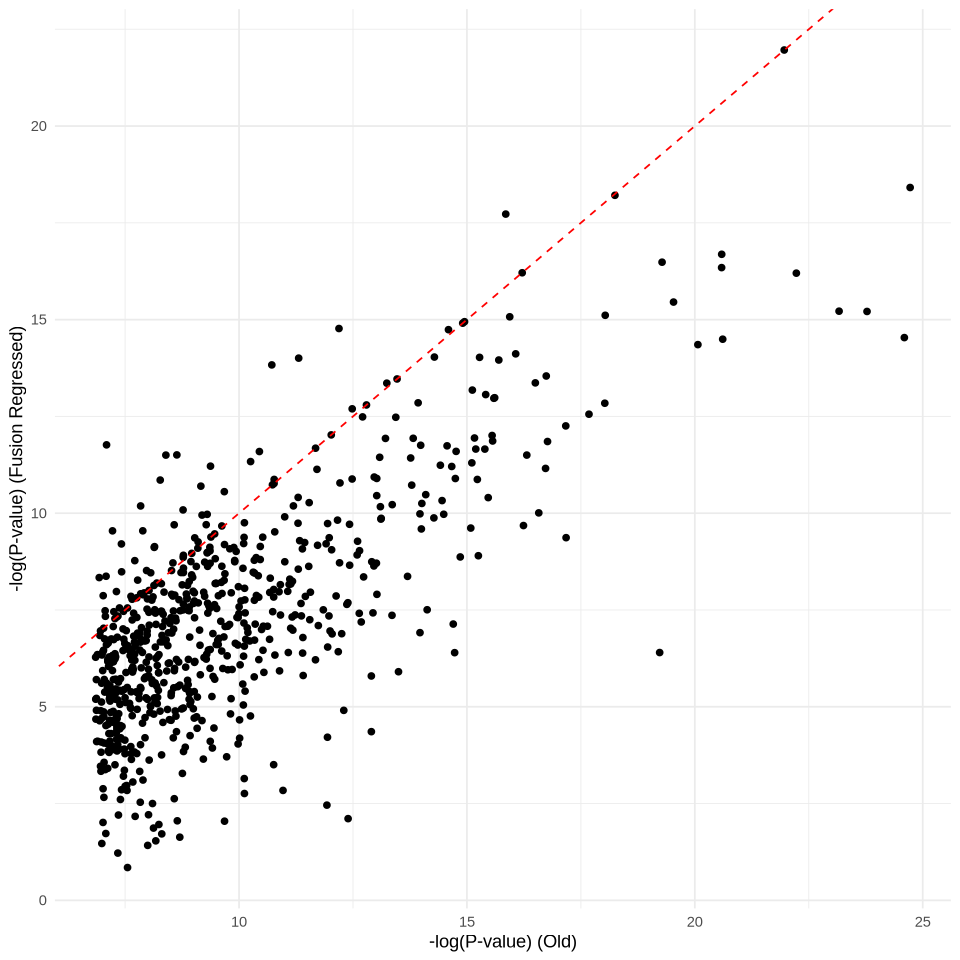

[1] 76

[1] "horvath sites that are heritable: 76"

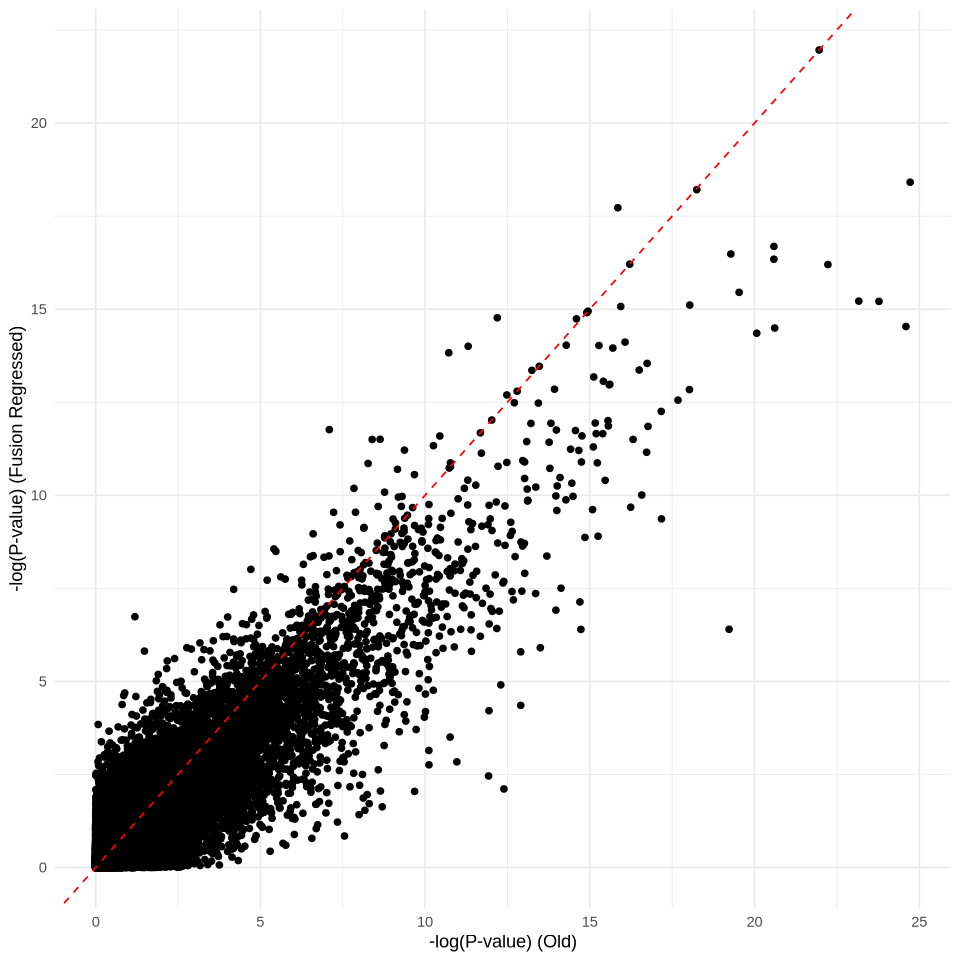

[1] "percent of time horvath p-value improved with meqtl regression for horvath sites: 0.0131578947368421"

[1] "mean diff in p-value for improved horvath sig associations: 0.331780313798975"

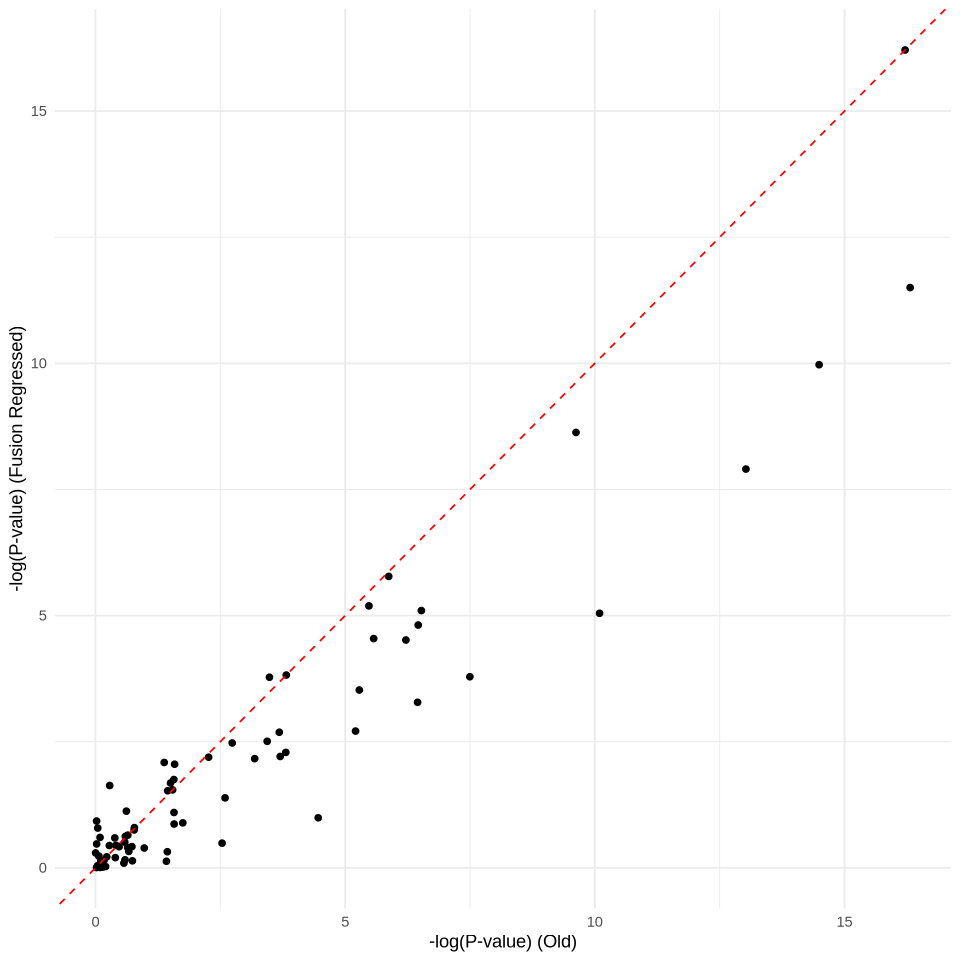

In [7]:
#P-value improvement for Fusion regress meta-ewas 
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value.fix < .05/n)
}
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/heritable_cpgs.RData")
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
meta_no_regress <- meta_gen
rm(list=c("meta_gen"))
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_fusion_regressed.RData")
meta_fusion_regress <- meta_gen


####for sig sites#########
meta_no_regress_sig <- sig_sites(meta_no_regress)
paste0("sig sites in meta no regress: ", nrow(meta_no_regress_sig))

meta_no_regress_sig_heritable_cpgs <- meta_no_regress_sig %>% filter(CPG.Labels %in% pop_spec_heritable_cpgs)
meta_fusion_regress_sig_heritable_cpgs <- meta_fusion_regress %>% filter(CPG.Labels %in% meta_no_regress_sig_heritable_cpgs$CPG.Labels)
paste0("sig sites that are heritable: ", nrow(meta_no_regress_sig_heritable_cpgs))

# Calculate -log(p-value) for both datasets
meta_no_regress_sig_heritable_cpgs$p_value_old <- -log10(meta_no_regress_sig_heritable_cpgs$P.value.fix)
meta_fusion_regress_sig_heritable_cpgs$p_value_meqtls <- -log10(meta_fusion_regress_sig_heritable_cpgs$P.value.fix)

# Merge the datasets
p_val <- merge(meta_no_regress_sig_heritable_cpgs, meta_fusion_regress_sig_heritable_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regressed)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)
nrow(p_val)
# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time p-value improved with fusion regression for sig_sites: ", improved_ratio)
paste0("mean diff in p-value for improved associations for sig_sites: ", mean(p_val[p_val$diff > 0, "diff"]))
####for all sites#########

meta_no_regress_heritable_cpgs <- meta_no_regress %>% filter(CPG.Labels %in% pop_spec_heritable_cpgs)
meta_fusion_regress_heritable_cpgs <- meta_fusion_regress  %>% filter(CPG.Labels %in% meta_no_regress_heritable_cpgs$CPG.Labels)
paste0("total sites that are heritable: ", nrow(meta_no_regress_heritable_cpgs))

# Calculate -log(p-value) for both datasets
meta_no_regress_heritable_cpgs$p_value_old <- -log10(meta_no_regress_heritable_cpgs$P.value.fix)
meta_fusion_regress_heritable_cpgs$p_value_meqtls <- -log10(meta_fusion_regress_heritable_cpgs$P.value.fix)

# Merge the datasets
p_val <- merge(meta_no_regress_heritable_cpgs, meta_fusion_regress_heritable_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
nrow(p_val)
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time p-value improved with fusion regression for all sites that are heritable: ", improved_ratio)

paste0("mean diff in p-value for improved associations for all sites that are heritable: ", mean(p_val[p_val$diff > 0, "diff"]))
ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regressed)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

#####specifically for horvath all sites##########
horvath_meqtls <- Horvath_sites[Horvath_sites %in% pop_spec_heritable_cpgs]

p_val <- p_val[p_val$CPG.Labels %in% horvath_meqtls,]
nrow(p_val)
paste0("horvath sites that are heritable: ", nrow(p_val))
ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regressed)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()
# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time horvath p-value improved with meqtl regression for horvath sites: ", improved_ratio)

# Summary of the improvement

paste0("mean diff in p-value for improved horvath sig associations: ", mean(p_val[p_val$diff > 0, "diff"]))
######################

[1] "sig sites in meta meqtl regress: 3427"

[1] "sig sites that are heritable: 820"

[1] 690

[1] "percent of time p-value improved with fusion regression for sig_sites: 0.0217391304347826"

[1] "mean diff in p-value for improved associations for sig_sites: 0.760210340618021"

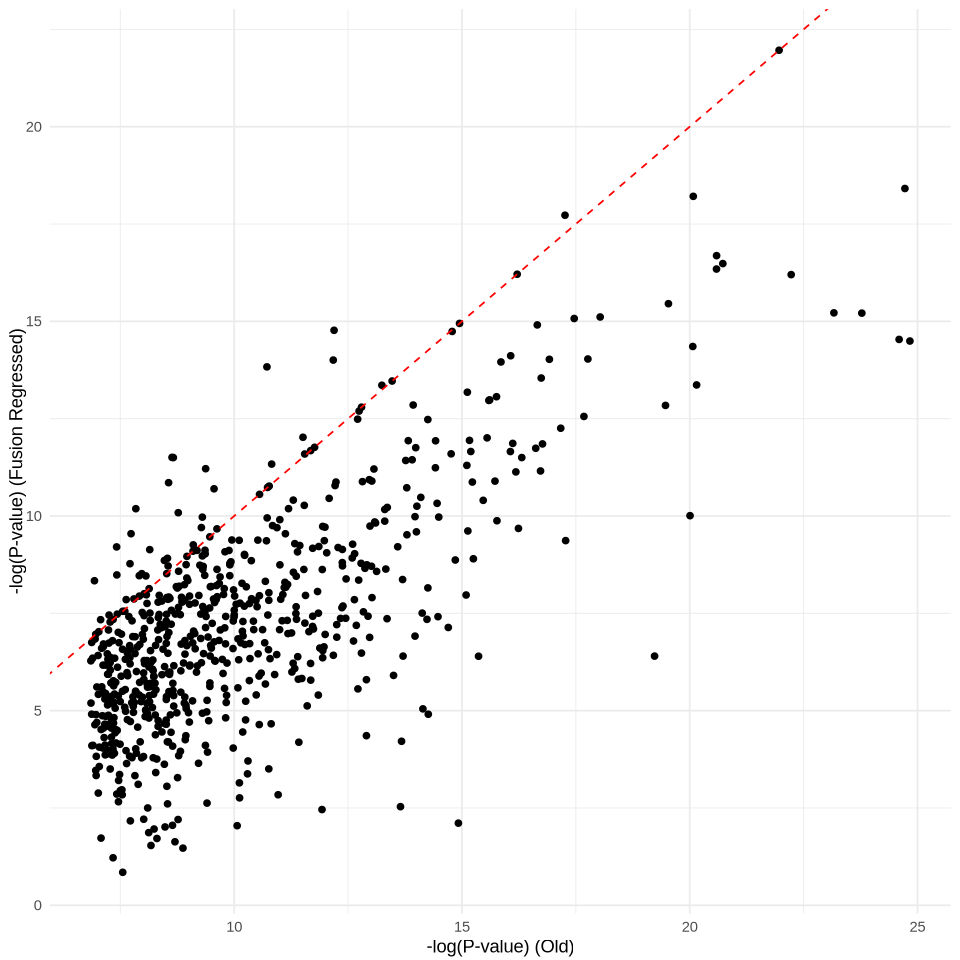

In [8]:
#P-value improvement for Fusion regress meta-ewas over MEQTL regressed
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value.fix < .05/n)
}
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/heritable_cpgs.RData")
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_meqtl_regressed.RData")
meta_meqtl_regress <- meta_gen
rm(list=c("meta_gen"))
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_fusion_regressed.RData")
meta_fusion_regress <- meta_gen


####for sig sites#########
meta_meqtl_regress_sig <- sig_sites(meta_meqtl_regress )
paste0("sig sites in meta meqtl regress: ", nrow(meta_meqtl_regress_sig ))

meta_meqtl_regress_sig_heritable_cpgs <- meta_meqtl_regress_sig %>% filter(CPG.Labels %in% pop_spec_heritable_cpgs)
meta_fusion_regress_sig_heritable_cpgs <- meta_fusion_regress %>% filter(CPG.Labels %in% meta_no_regress_sig_heritable_cpgs$CPG.Labels)
paste0("sig sites that are heritable: ", nrow(meta_meqtl_regress_sig_heritable_cpgs))

# Calculate -log(p-value) for both datasets
meta_meqtl_regress_sig_heritable_cpgs $p_value_old <- -log10(meta_meqtl_regress_sig_heritable_cpgs $P.value.fix)
meta_fusion_regress_sig_heritable_cpgs$p_value_meqtls <- -log10(meta_fusion_regress_sig_heritable_cpgs$P.value.fix)

# Merge the datasets
p_val <- merge(meta_meqtl_regress_sig_heritable_cpgs , meta_fusion_regress_sig_heritable_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regressed)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)
nrow(p_val)
# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
paste0("percent of time p-value improved with fusion regression for sig_sites: ", improved_ratio)
paste0("mean diff in p-value for improved associations for sig_sites: ", mean(p_val[p_val$diff > 0, "diff"]))


In [9]:
##P-value improvement for fake perms of meta_analysis
rm(list=ls())
sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value.fix < .05/n)
}
Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")

total_sig_sites_improved_ratio <- c()
total_sig_sites_improved_diff <- c()

horvath_sites_improved_ratio <- c()
horvath_sites_improved_diff <- c()
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/metagen_all3_no_meqtl_regress.RData")
meta_no_regress <- meta_gen
meta_no_regress_sig <- sig_sites(meta_no_regress)
i <- 1
while(i < 51){
    load(paste0("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/fake_perms/metagen_all3_fake_meqtl_regressed",i,".RData"))
    fake_meqtl_regress <- meta_gen
    #print(paste0("total sites in merged no regress: ", nrow(meta_no_regress)))     
    meta_no_regress_sig <- sig_sites(meta_no_regress)
    meta_no_regress_sig_meqtl_cpgs <- meta_no_regress_sig %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    fake_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress %>% filter(CPG.Labels %in%  meta_no_regress_sig_meqtl_cpgs$CPG.Labels)
    #print(paste0("total sig sites in merged no regress with meqtl: ", nrow(meta_no_regress_sig_meqtl_cpgs)))
    
    fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value.fix)
    meta_no_regress_sig_meqtl_cpgs$p_value_old <- -log10(meta_no_regress_sig_meqtl_cpgs$P.value.fix)
     
    p_val <- merge(meta_no_regress_sig_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
    p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old) 
    improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
    total_sig_sites_improved_ratio <- c(total_sig_sites_improved_ratio, improved_ratio)
    total_sig_sites_improved_diff <- c(total_sig_sites_improved_diff, mean(p_val[p_val$diff > 0, "diff"]))     

    
    #all so can select all horvath sites not just sig horvath sites
    meta_no_regress_meqtl_cpgs <- meta_no_regress %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    meta_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress  %>% filter(CPG.Labels %in% meta_no_regress_meqtl_cpgs$CPG.Labels)
    #paste0("total sites that have an meqtl: ", nrow(meta_meqtl_no_regress_meqtl_cpgs))
    # Calculate -log(p-value) for both datasets
    meta_no_regress_meqtl_cpgs <- meta_no_regress %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    fake_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress %>% filter(CPG.Labels %in% meta_no_regress_meqtl_cpgs$CPG.Labels)    
    meta_no_regress_meqtl_cpgs$p_value_old <- -log10(meta_no_regress_meqtl_cpgs$P.value.fix)
    fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value.fix)
    # Merge the datasets
    p_val <- merge(meta_no_regress_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
    # Calculate improvement in p-values
    p_val <- p_val[p_val$CPG.Labels %in% Horvath_sites,]
    p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)
    #paste0("horvath sites with meqtl: ", nrow(p_val))
    improved_ratio <-nrow(p_val[p_val$p_value_old < p_val$p_value_meqtls - 1, ])/nrow(p_val)
    horvath_sites_improved_ratio <- c(horvath_sites_improved_ratio, improved_ratio)
    horvath_sites_improved_diff <- c(horvath_sites_improved_diff, mean(p_val[p_val$diff > 0, "diff"]))     
    i <- i + 1

}

mean(total_sig_sites_improved_ratio)
mean(total_sig_sites_improved_diff)
mean(horvath_sites_improved_ratio)
mean(horvath_sites_improved_diff)

summary(total_sig_sites_improved_diff)
summary(horvath_sites_improved_diff)

[1] 0.00524031

[1] 0.1749162

[1] 0.0007692308

[1] 0.07569632

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1457  0.1660  0.1764  0.1749  0.1834  0.2083 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03431 0.06303 0.07236 0.07570 0.09255 0.13436 

In [48]:
####################COMBINED EWAS ANALYSIS###################################
rm(list=ls())
##metagen metanalysis
Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/update_lit_sites.RData")
load("/share/hennlab/vault/people/shyamie/methylation/results/methylation_age.RData")

sig_sites <- function(df){
    n <- nrow(df)
    df_subset <- subset(df, P.value < .05/n)
}

Horvath <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/Horvath_test/AdditionalFile23predictor.csv")
Horvath <- Horvath[-1,]
Horvath_sites <- Horvath$CpGmarker
load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/meqtl_cpgs.RData")
all_emmax_no_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_no_meqtl_regressed.ps", header=FALSE, col.names = c("CPG.Labels","V2","P.value"))
all_emmax_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_meqtl_regressed.ps", header=FALSE, col.names = c("CPG.Labels","V2","P.value"))
all_emmax_fusion_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_fusion_regressed.ps", header=FALSE, col.names = c("CPG.Labels","V2","P.value"))


meqtl_no_regress <- sig_sites(all_emmax_no_regress)
meqtl_regress <- sig_sites(all_emmax_regress)
fusion_regress <- sig_sites(all_emmax_fusion_regress)

nrow(meqtl_no_regress)
nrow(meqtl_regress)
nrow(fusion_regress)

cat(paste0("number of overlapping Horvath and fixed effect meta-analysis sites: ", length(intersect(Horvath_sites, meqtl_no_regress$CPG.Labels)), "\n")) 
cat(paste0("number of overlapping literature and fixed effect meta-analysis sites: ", length(intersect(lit_sites, meqtl_no_regress$CPG.Labels)), "\n")) 


paste0("# of hits from original that stayed significant after meqtl regression: ", nrow(meqtl_no_regress[meqtl_no_regress$CPG.Labels %in% meqtl_regress$CPG.Labels,]))
paste0("# of hits only after meqtl regression not in original: ", nrow(meqtl_regress[!meqtl_regress$CPG.Labels %in% meqtl_no_regress$CPG.Labels,]))
paste0("# of hits only after meqtl regression not in fusion regress: ", nrow(meqtl_regress[!meqtl_regress$CPG.Labels %in% fusion_regress$CPG.Labels,]))


paste0("# of hits from original that stayed significant after fusion regression: ", nrow(meqtl_no_regress[meqtl_no_regress$CPG.Labels %in% fusion_regress$CPG.Labels,]))
paste0("# of hits only after fusion regression not in original: ", nrow(fusion_regress[!fusion_regress$CPG.Labels %in% meqtl_no_regress$CPG.Labels,]))
paste0("# of hits only after fusion regression not in meqtl regress: ", nrow(fusion_regress[!fusion_regress$CPG.Labels %in% meqtl_regress$CPG.Labels,]))


[1] 4201

[1] 4366

[1] 4240

number of overlapping Horvath and fixed effect meta-analysis sites: 51
number of overlapping literature and fixed effect meta-analysis sites: 1981


[1] "# of hits from original that stayed significant after meqtl regression: 4145"

[1] "# of hits only after meqtl regression not in original: 221"

[1] "# of hits only after meqtl regression not in fusion regress: 291"

[1] "# of hits from original that stayed significant after fusion regression: 4049"

[1] "# of hits only after fusion regression not in original: 191"

[1] "# of hits only after fusion regression not in meqtl regress: 165"

[1] "sig sites in meta no regress: 4201"

[1] "sig sites that have an meqtl: 897"

[1] "percent of time p-value improved with meqtl regression for sig_sites: 0.332936979785969"

[1] "mean diff in p-value for improved associations for sig_sites: 1.11293877200811"

[1] "total sites that have an meqtl: 61407"

[1] 61407

[1] "percent of time p-value improved with meqtl regression for all sites with meqtl: 0.0273747292653932"

[1] "mean diff in p-value for improved associations for all sites with meqtl: 0.284275323890727"

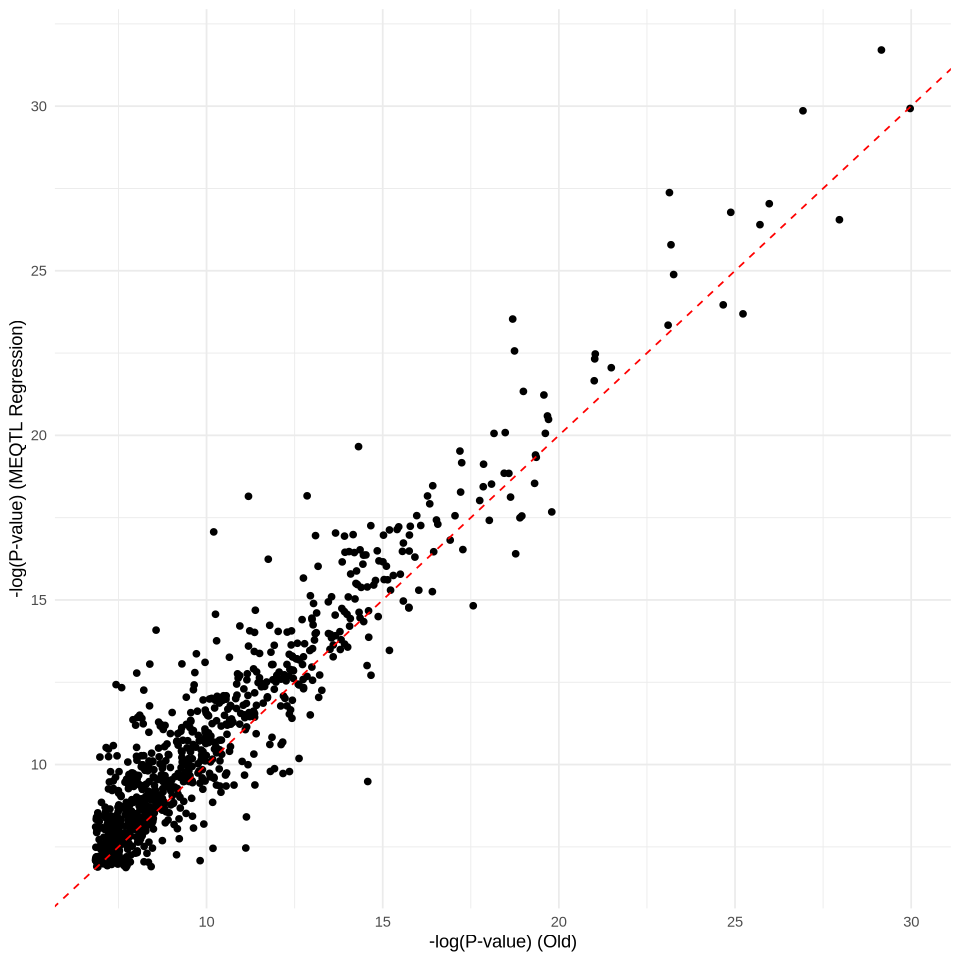

[1] 32

[1] "horvath sites with meqtl: 32"

[1] "percent of time horvath p-value improved with meqtl regression for horvath sites: 0.1875"

[1] "mean diff in p-value for improved horvath sig associations: 1.00811381652325"

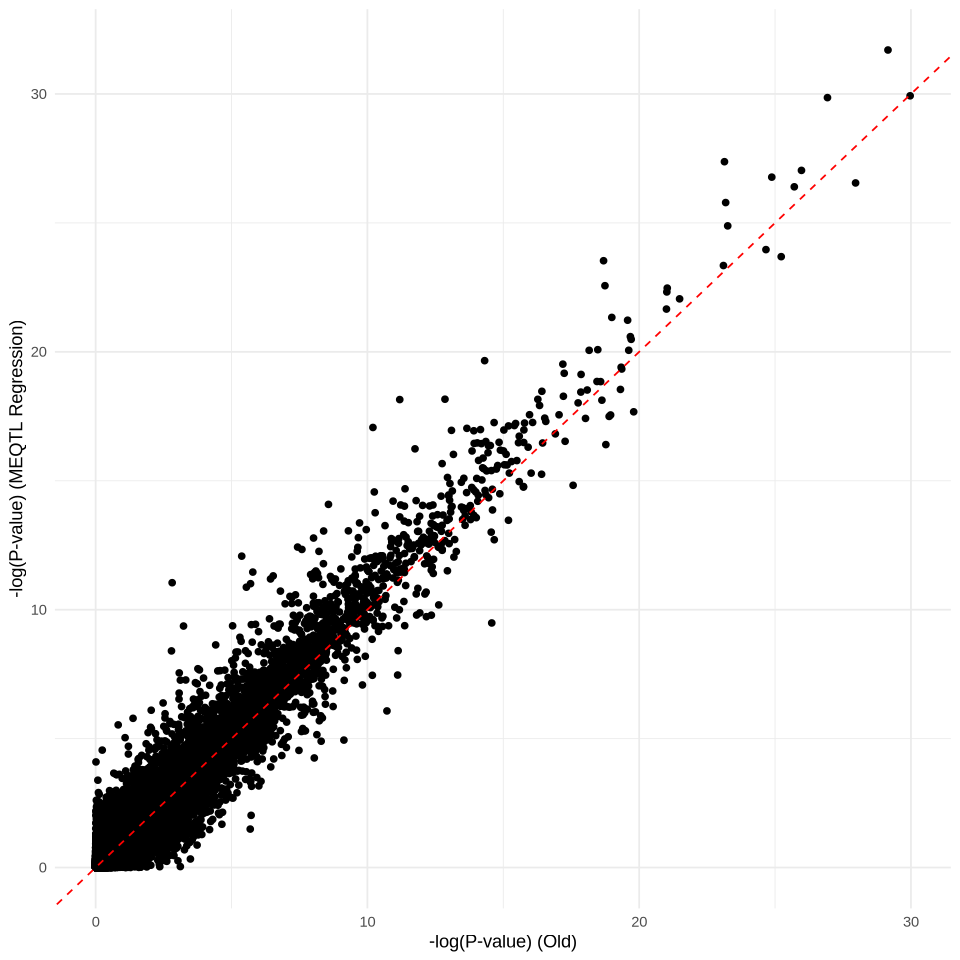

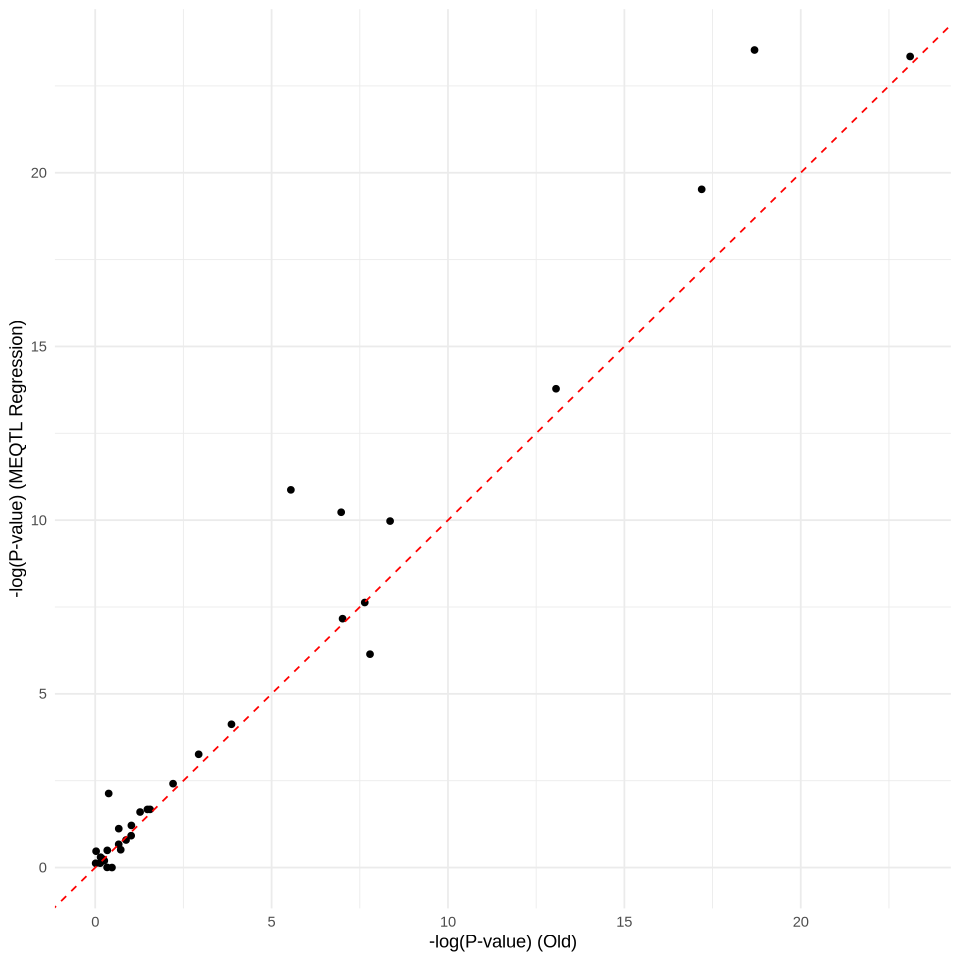

In [49]:
options(repr.plot.width = 8, repr.plot.height = 8)

######MEQTL regress from all#########
####for sig sites#########
no_regress_sig <- sig_sites(meqtl_no_regress)
paste0("sig sites in meta no regress: ", nrow(no_regress_sig))

no_regress_sig_meqtl_cpgs <- no_regress_sig %>% filter(CPG.Labels %in% all_meqtl_cpgs)
meqtl_regress_sig_cpgs <- meqtl_regress %>% filter(CPG.Labels %in% no_regress_sig_meqtl_cpgs$CPG.Labels)
paste0("sig sites that have an meqtl: ", nrow(no_regress_sig_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
no_regress_sig_meqtl_cpgs$p_value_old <- -log10(no_regress_sig_meqtl_cpgs$P.value)
meqtl_regress_sig_cpgs$p_value_meqtls <- -log10(meqtl_regress_sig_cpgs$P.value)

# Merge the datasets
p_val <- merge(no_regress_sig_meqtl_cpgs, meqtl_regress_sig_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time p-value improved with meqtl regression for sig_sites: ", improved_ratio)
paste0("mean diff in p-value for improved associations for sig_sites: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (MEQTL Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

write.table(p_val, file="/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/age_meqtl_merged_regress_vs_no_regress.csv", quote=FALSE, row.names=FALSE, col.names=FALSE)


####for all sites#########

no_regress_meqtl_cpgs <- all_emmax_no_regress %>% filter(CPG.Labels %in% all_meqtl_cpgs)
meqtl_regress_meqtl_cpgs <- all_emmax_regress  %>% filter(CPG.Labels %in% no_regress_meqtl_cpgs$CPG.Labels)
paste0("total sites that have an meqtl: ", nrow(no_regress_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
no_regress_meqtl_cpgs$p_value_old <- -log10(no_regress_meqtl_cpgs$P.value)
meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(meqtl_regress_meqtl_cpgs$P.value)

# Merge the datasets
p_val <- merge(no_regress_meqtl_cpgs, meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
nrow(p_val)
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time p-value improved with meqtl regression for all sites with meqtl: ", improved_ratio)

paste0("mean diff in p-value for improved associations for all sites with meqtl: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (MEQTL Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

#####specifically for horvath all sites##########
horvath_meqtls <- Horvath_sites[Horvath_sites %in% pop_spec_meqtl_cpgs]

p_val <- p_val[p_val$CPG.Labels %in% horvath_meqtls,]
nrow(p_val)
paste0("horvath sites with meqtl: ", nrow(p_val))

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time horvath p-value improved with meqtl regression for horvath sites: ", improved_ratio)

# Summary of the improvement

paste0("mean diff in p-value for improved horvath sig associations: ", mean(p_val[p_val$diff > 0, "diff"]))
######################

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (MEQTL Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

[1] "sig sites in meta no regress: 4201"

[1] "sig sites that are heritable: 667"

[1] "percent of time p-value improved with fusion regression for sig_sites: 0.285436893203883"

[1] "mean diff in p-value for improved associations for sig_sites: 1.5388686543702"

[1] "total sites that have an meqtl: 41436"

[1] 41436

[1] "percent of time p-value improved with meqtl regression for all sites with meqtl: 0.0691427743990733"

[1] "mean diff in p-value for improved associations for all sites with meqtl: 0.507304423714554"

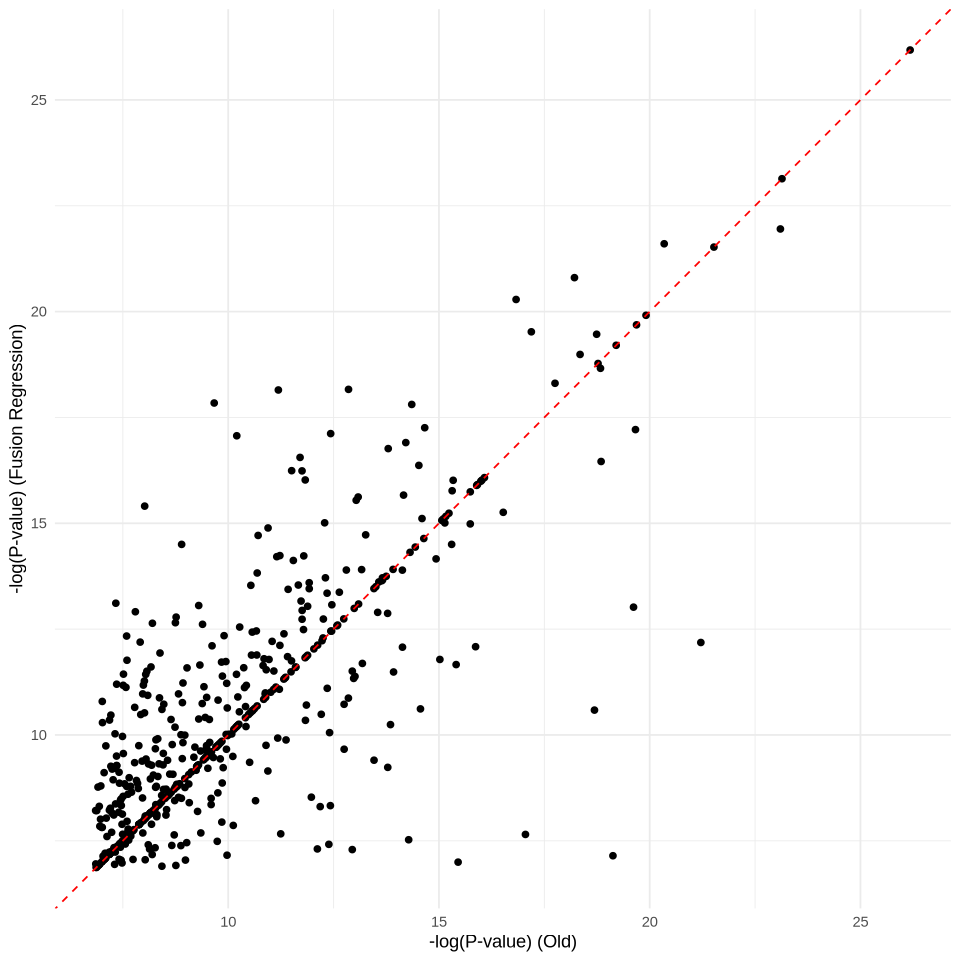

[1] 22

[1] "horvath sites with meqtl: 22"

[1] "percent of time horvath p-value improved with meqtl regression for horvath sites: 0.136363636363636"

[1] "mean diff in p-value for improved horvath sig associations: 1.28929069425117"

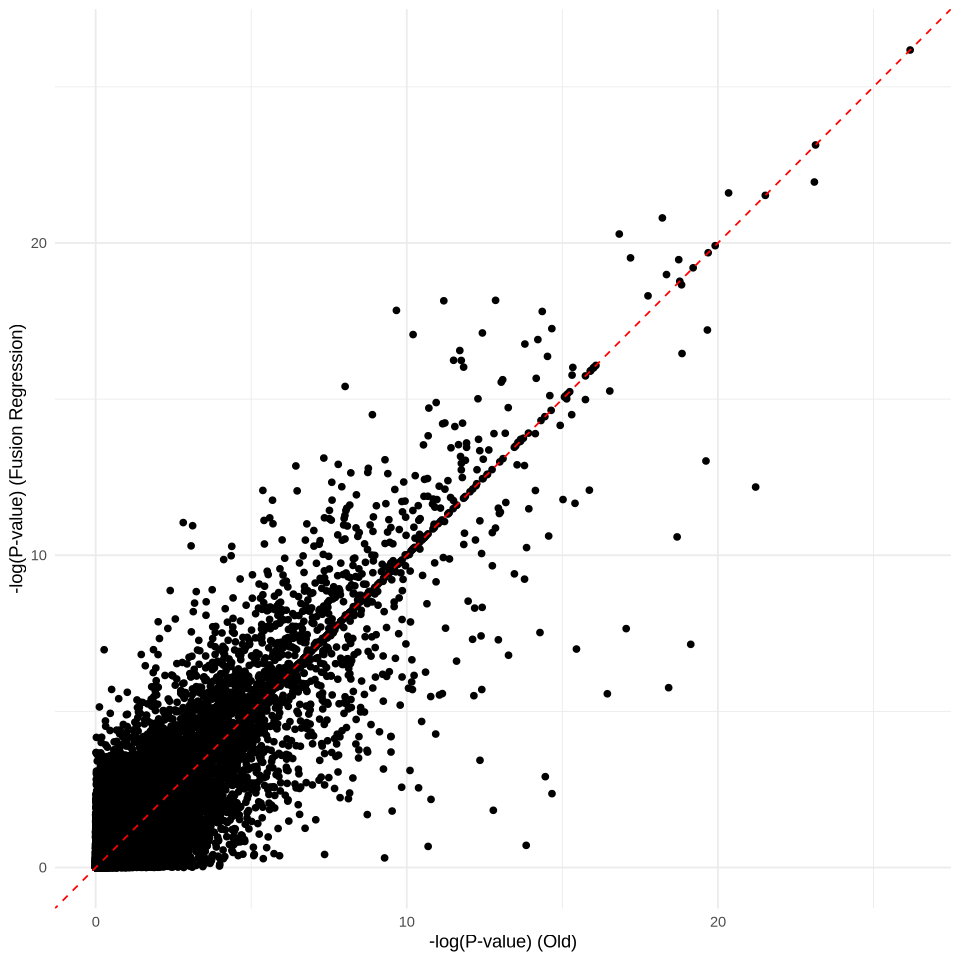

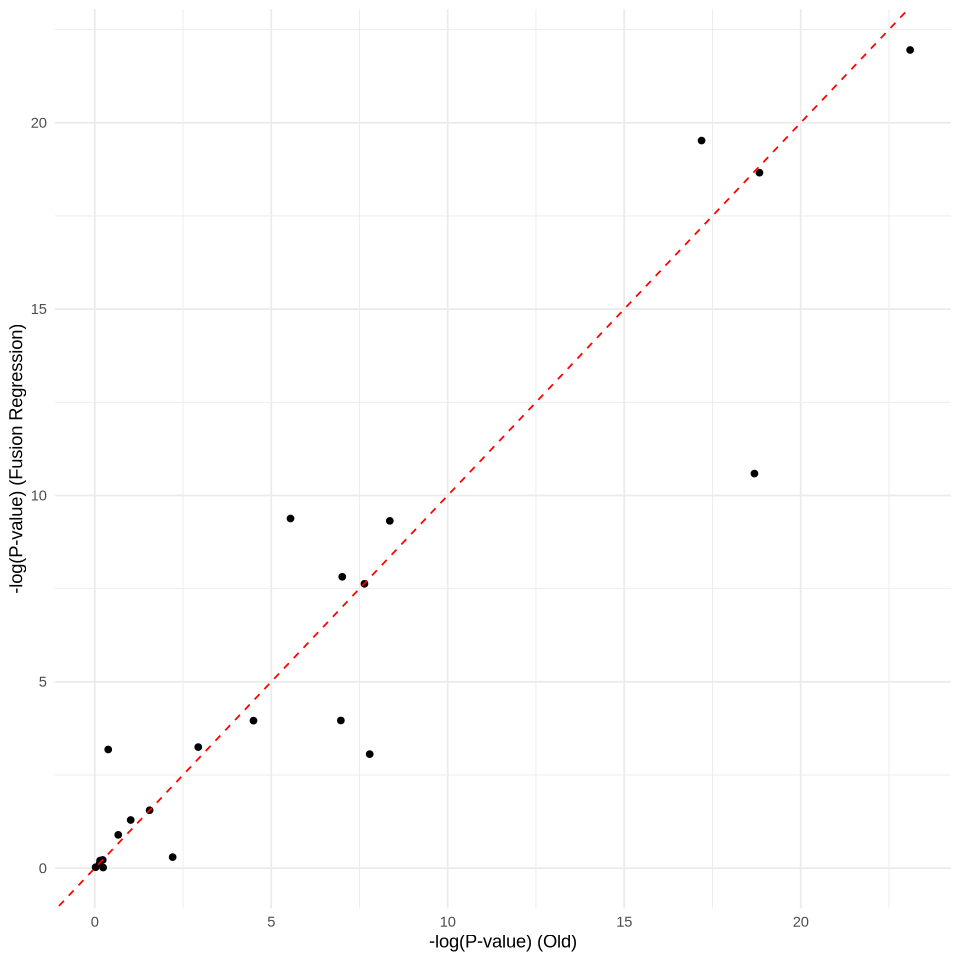

In [50]:
#####Combined EWAS FUSION regressed
options(repr.plot.width = 8, repr.plot.height = 8)

load("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/heritable_cpgs.RData")
no_regress_sig <- sig_sites(meqtl_no_regress)
paste0("sig sites in meta no regress: ", nrow(no_regress_sig))

no_regress_sig_meqtl_cpgs <- no_regress_sig %>% filter(CPG.Labels %in% all_heritable_cpgs)
fusion_regress_sig_cpgs <- fusion_regress %>% filter(CPG.Labels %in% no_regress_sig_meqtl_cpgs$CPG.Labels)
paste0("sig sites that are heritable: ", nrow(no_regress_sig_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
no_regress_sig_meqtl_cpgs$p_value_old <- -log10(no_regress_sig_meqtl_cpgs$P.value)
fusion_regress_sig_cpgs$p_value_meqtls <- -log10(fusion_regress_sig_cpgs$P.value)

# Merge the datasets
p_val <- merge(no_regress_sig_meqtl_cpgs, fusion_regress_sig_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))

# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time p-value improved with fusion regression for sig_sites: ", improved_ratio)
paste0("mean diff in p-value for improved associations for sig_sites: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

####for all sites#########

no_regress_meqtl_cpgs <- all_emmax_no_regress %>% filter(CPG.Labels %in% all_heritable_cpgs)
fusion_regress_meqtl_cpgs <- all_emmax_fusion_regress  %>% filter(CPG.Labels %in% no_regress_meqtl_cpgs$CPG.Labels)
paste0("total sites that have an meqtl: ", nrow(no_regress_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
no_regress_meqtl_cpgs$p_value_old <- -log10(no_regress_meqtl_cpgs$P.value)
fusion_regress_meqtl_cpgs$p_value_meqtls <- -log10(fusion_regress_meqtl_cpgs$P.value)

# Merge the datasets
p_val <- merge(no_regress_meqtl_cpgs, fusion_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
nrow(p_val)
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time p-value improved with meqtl regression for all sites with meqtl: ", improved_ratio)

paste0("mean diff in p-value for improved associations for all sites with meqtl: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

#####specifically for horvath all sites##########
horvath_meqtls <- Horvath_sites[Horvath_sites %in% pop_spec_meqtl_cpgs]

p_val <- p_val[p_val$CPG.Labels %in% horvath_meqtls,]
nrow(p_val)
paste0("horvath sites with meqtl: ", nrow(p_val))

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time horvath p-value improved with meqtl regression for horvath sites: ", improved_ratio)

# Summary of the improvement

paste0("mean diff in p-value for improved horvath sig associations: ", mean(p_val[p_val$diff > 0, "diff"]))
######################

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Old)", y = "-log(P-value) (Fusion Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

In [51]:
length(intersect(all_meqtl_cpgs, all_heritable_cpgs))
her_and_meqtl <- intersect(all_meqtl_cpgs, all_heritable_cpgs)

[1] 24884

[1] "total sites that have an meqtl: 24884"

[1] 24884

,CPG.Labels,V2_old,P.value_old,p_value_old,V2_meqtls,P.value_meqtls,p_value_meqtls
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cg00000714,-69.67179,0.340266033,0.4681814,-106.87124,0.15878444,0.7991921
2,cg00000807,-40.87578,0.100395894,0.9982840,-58.16935,0.04328494,1.3636632
3,cg00000884,117.55691,0.228870832,0.6404096,100.01288,0.74385343,0.1285126
4,cg00002190,131.44770,0.006448451,2.1905446,35.83652,0.61410677,0.2117561
5,cg00002449,170.28899,0.261124382,0.5831526,318.70639,0.05244218,1.2803193
6,cg00002473,57.58987,0.183996169,0.7351912,245.41701,0.01218362,1.9142236


[1] "percent of time p-value improved with fusion over meqtl regression for all sites with meqtl and heritable: 0.0573460858382897"

[1] "mean diff in p-value for improved associations for all sites with meqtl: 0.423439337974285"

[1] 31

[1] "horvath sites with meqtl: 31"

[1] "percent of time horvath p-value improved with fusion over meqtl regression for all sites with meqtl and heritable for horvath sites: 0.129032258064516"

[1] "mean diff in p-value for improved horvath sig associations: 0.885984753249532"

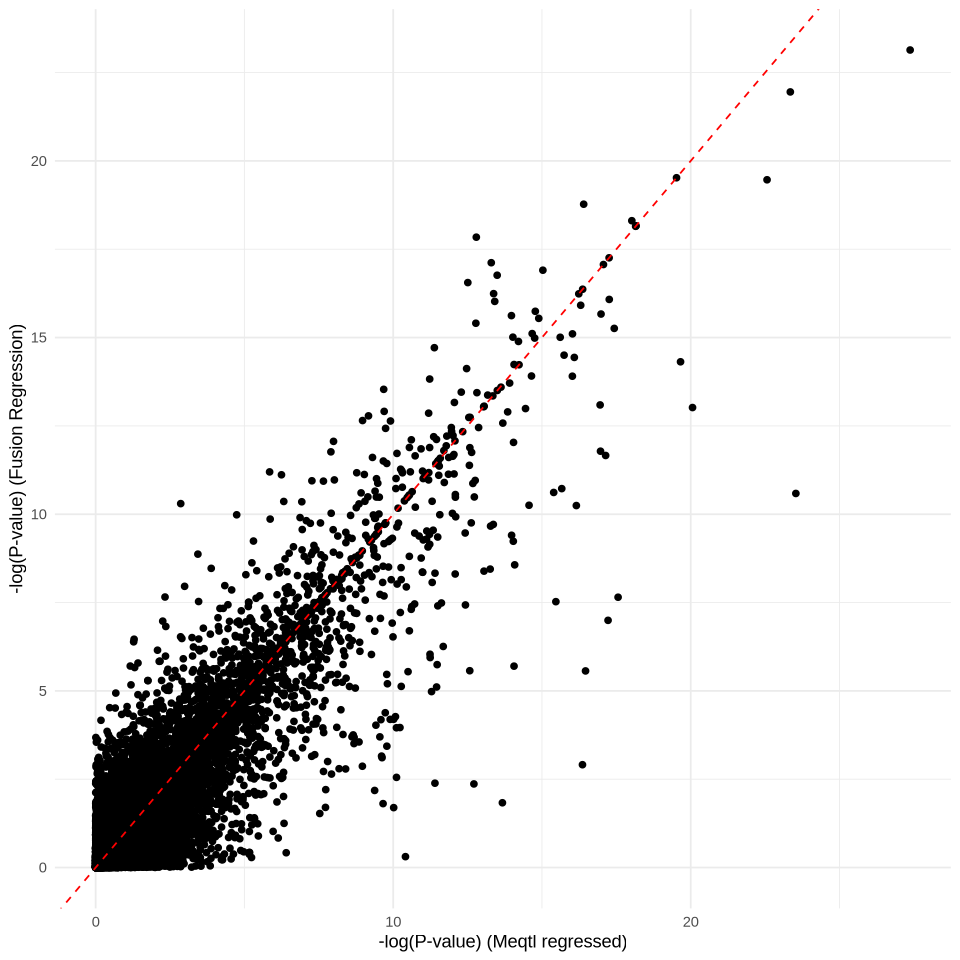

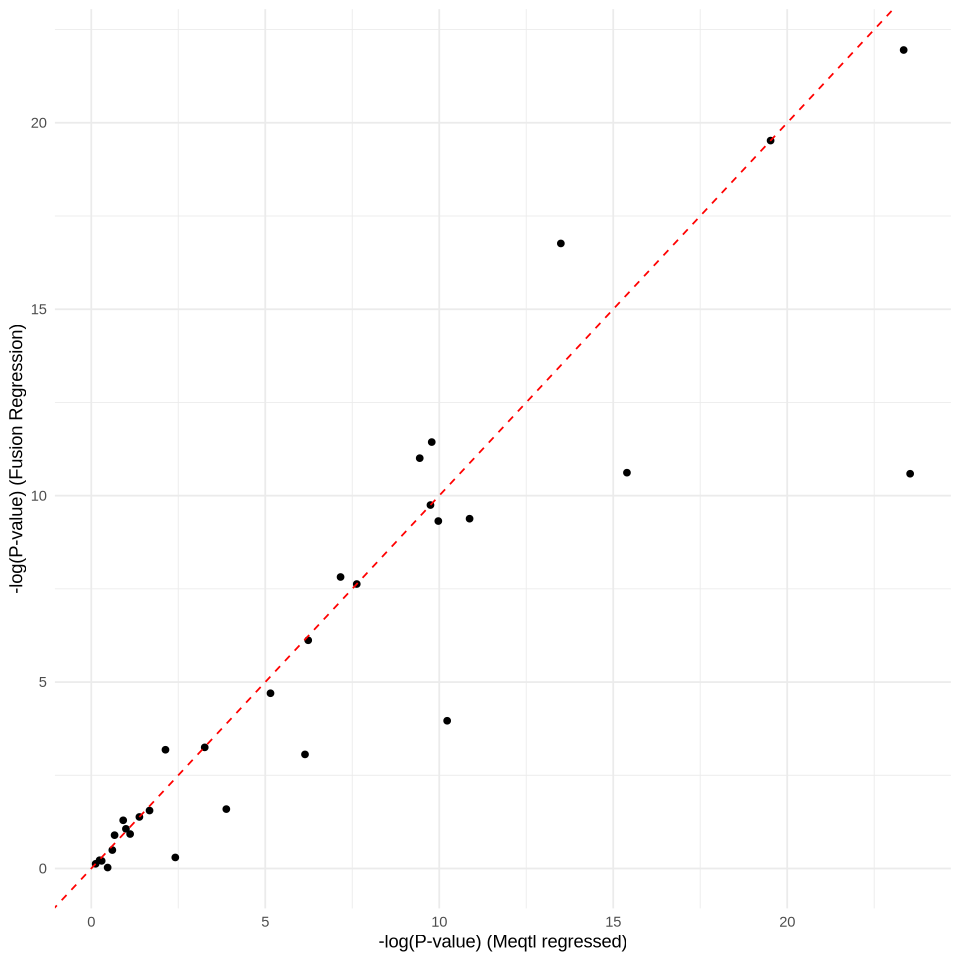

In [52]:
###compare fusion and meqtl regressed p-values###

#####Combined EWAS FUSION regressed
options(repr.plot.width = 8, repr.plot.height = 8)

####for all sites#########
all_emmax_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_meqtl_regressed.ps", header=FALSE, col.names = c("CPG.Labels","V2","P.value"))
all_emmax_fusion_regress <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/all_covs_fusion_regressed.ps", header=FALSE, col.names = c("CPG.Labels","V2","P.value"))

meqtl_regress_meqtl_cpgs <- all_emmax_regress %>% filter(CPG.Labels %in% her_and_meqtl)
fusion_regress_meqtl_cpgs <- all_emmax_fusion_regress  %>% filter(CPG.Labels %in% meqtl_regress_meqtl_cpgs$CPG.Labels)
paste0("total sites that have an meqtl: ", nrow(meqtl_regress_meqtl_cpgs))

# Calculate -log(p-value) for both datasets
meqtl_regress_meqtl_cpgs$p_value_old <- -log10(meqtl_regress_meqtl_cpgs$P.value)
fusion_regress_meqtl_cpgs$p_value_meqtls <- -log10(fusion_regress_meqtl_cpgs$P.value)

# Merge the datasets
p_val <- merge(meqtl_regress_meqtl_cpgs, fusion_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
nrow(p_val)
head(p_val)
# Calculate improvement in p-values
p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time p-value improved with fusion over meqtl regression for all sites with meqtl and heritable: ", improved_ratio)

paste0("mean diff in p-value for improved associations for all sites with meqtl: ", mean(p_val[p_val$diff > 0, "diff"]))

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Meqtl regressed)", y = "-log(P-value) (Fusion Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

#####specifically for horvath all sites##########
horvath_meqtls <- Horvath_sites[Horvath_sites %in% her_and_meqtl]

p_val <- p_val[p_val$CPG.Labels %in% horvath_meqtls,]
nrow(p_val)
paste0("horvath sites with meqtl: ", nrow(p_val))

# Calculate percentage of time p-value improved with meqtl regression
improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
paste0("percent of time horvath p-value improved with fusion over meqtl regression for all sites with meqtl and heritable for horvath sites: ", improved_ratio)

# Summary of the improvement

paste0("mean diff in p-value for improved horvath sig associations: ", mean(p_val[p_val$diff > 0, "diff"]))
######################

ggplot(p_val, aes(x = p_value_old, y = p_value_meqtls)) +
  geom_point() +
  labs(x = "-log(P-value) (Meqtl regressed)", y = "-log(P-value) (Fusion Regression)") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal()

In [53]:
###fake perms of all###
total_sig_sites_improved_ratio <- c()
total_sig_sites_improved_diff <- c()

horvath_sites_improved_ratio <- c()
horvath_sites_improved_diff <- c()
no_regress <- all_emmax_no_regress

i <- 1
while(i < 51){
    fake_meqtl_regress <- read.delim(paste0("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/fake_perms/",i,"all_covs_meqtl_regressed.ps"), header=FALSE, col.names = c("CPG.Labels","V2","P.value"))
    
    #print(paste0("total sites in merged no regress: ", nrow(meta_no_regress)))     
    no_regress_sig <- sig_sites(no_regress)
    no_regress_sig_meqtl_cpgs <- no_regress_sig %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    fake_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress %>% filter(CPG.Labels %in%  no_regress_sig_meqtl_cpgs$CPG.Labels)
    #print(paste0("total sig sites in merged no regress with meqtl: ", nrow(meta_no_regress_sig_meqtl_cpgs)))
    
    fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value)
    no_regress_sig_meqtl_cpgs$p_value_old <- -log10(no_regress_sig_meqtl_cpgs$P.value)
     
    p_val <- merge(no_regress_sig_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
    p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old) 
    improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
    total_sig_sites_improved_ratio <- c(total_sig_sites_improved_ratio, improved_ratio)
    total_sig_sites_improved_diff <- c(total_sig_sites_improved_diff, mean(p_val[p_val$diff > 0, "diff"]))     

    
    #all so can select all horvath sites not just sig horvath sites
    no_regress_meqtl_cpgs <- no_regress %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    meqtl_regress_meqtl_cpgs <- fake_meqtl_regress  %>% filter(CPG.Labels %in% no_regress_meqtl_cpgs$CPG.Labels)
    #paste0("total sites that have an meqtl: ", nrow(meta_meqtl_no_regress_meqtl_cpgs))
    # Calculate -log(p-value) for both datasets
    no_regress_meqtl_cpgs <- no_regress %>% filter(CPG.Labels %in% pop_spec_meqtl_cpgs)
    fake_meqtl_regress_meqtl_cpgs <- fake_meqtl_regress %>% filter(CPG.Labels %in% no_regress_meqtl_cpgs$CPG.Labels)    
    no_regress_meqtl_cpgs$p_value_old <- -log10(no_regress_meqtl_cpgs$P.value)
    fake_meqtl_regress_meqtl_cpgs$p_value_meqtls <- -log10(fake_meqtl_regress_meqtl_cpgs$P.value)
    # Merge the datasets
    p_val <- merge(no_regress_meqtl_cpgs, fake_meqtl_regress_meqtl_cpgs, by = "CPG.Labels", suffixes = c("_old", "_meqtls"))
    # Calculate improvement in p-values
    p_val <- p_val[p_val$CPG.Labels %in% Horvath_sites,]
    p_val <- p_val %>% mutate(diff = p_value_meqtls - p_value_old)
    #paste0("horvath sites with meqtl: ", nrow(p_val))
    improved_ratio <- mean(p_val$p_value_old < p_val$p_value_meqtls - 1)
    horvath_sites_improved_ratio <- c(horvath_sites_improved_ratio, improved_ratio)
    horvath_sites_improved_diff <- c(horvath_sites_improved_diff, mean(p_val[p_val$diff > 0, "diff"]))     
    i <- i + 1

}

mean(total_sig_sites_improved_ratio)
mean(total_sig_sites_improved_diff)
mean(horvath_sites_improved_ratio)
mean(horvath_sites_improved_diff)


[1] 0.002180294

[1] 0.187559

[1] 0.002564103

[1] 0.1218635